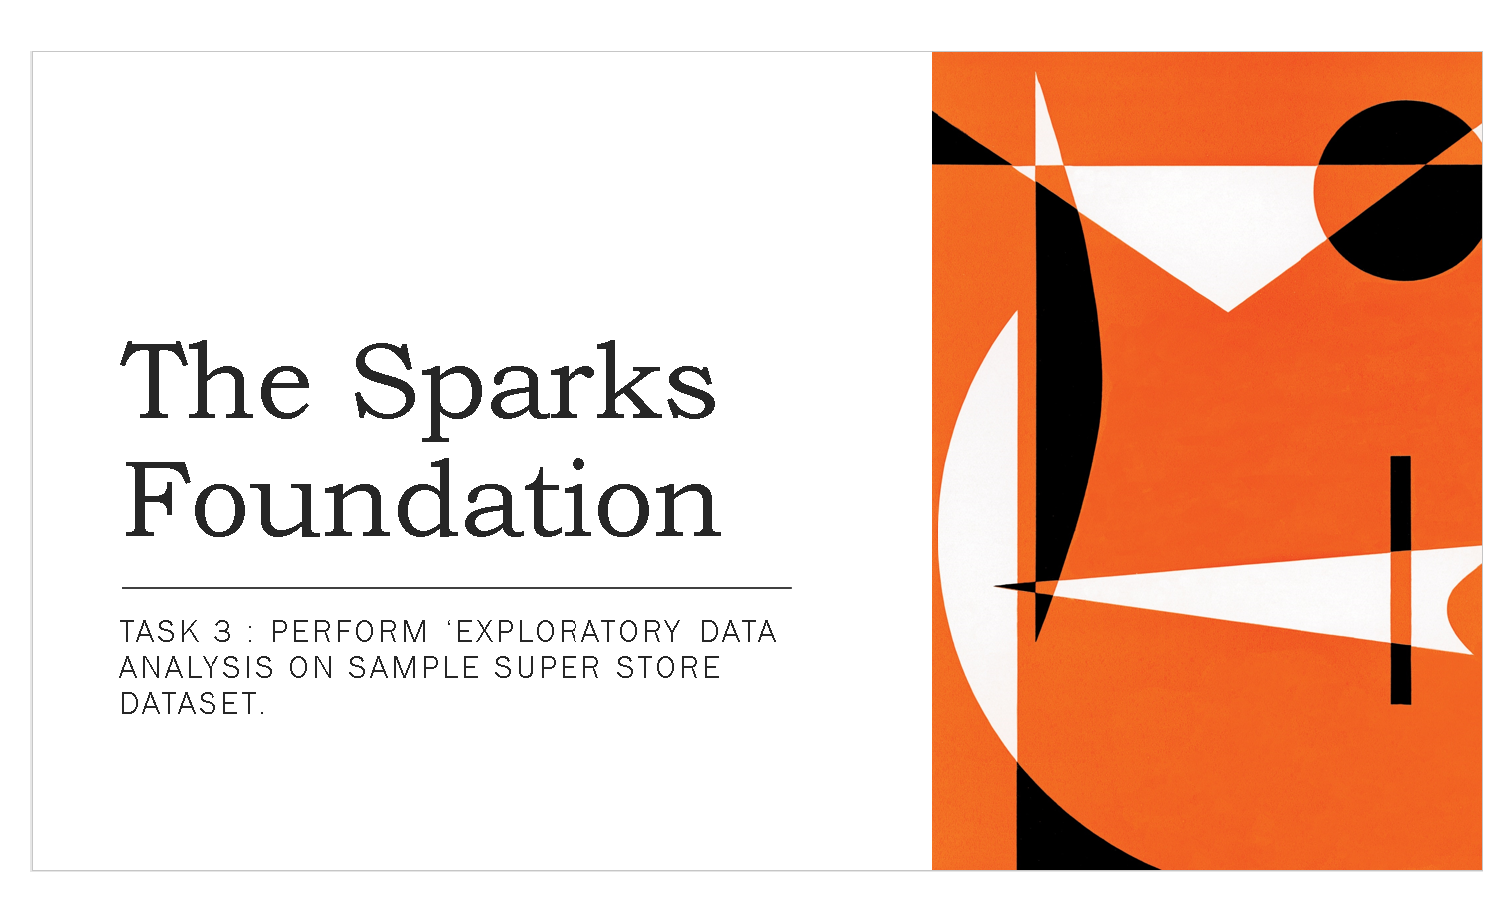

## Author : Kanishk Mehta (kanishkmehta1995@gmail.com)

In [1]:
# Importing the libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import random as rd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Bar palettes and hatches
palette = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 
'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 
'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 
'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 
'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r','mako', 'mako_r', 
'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r','rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r',
'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 
'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']


cmap=[ 'Pastel1', 'Pastel2', 'PuBuGn' ,'plasma',  'prism', 'rainbow' ,'inferno', 'viridis','Accent']

hatche = ['\'','-','.']

# Understanding the data

In [3]:
# Loading the dataset
retail = pd.read_csv('SampleSuperstore.csv')
retail.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [4]:
print('Dimensions : ',retail.shape)
print('Size of data : ',retail.size)

Dimensions :  (9994, 13)
Size of data :  129922


In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# Making new features such as Cost and profit percentage
retail['Cost'] = retail['Sales']-retail.Profit
retail['Profit%'] = 100*(retail.Profit/retail.Cost)
retail.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit       Cost    Profit%  
0      0.00   41.9136   220.0464  19.047619  
1      0.00  219.5820   512.3580  42.857143  
2      0.00    6.8714     7.7486  88.679245  
3      0.45 -383.0310  1340.6085 -28.571429  
4      0.20    2.5164    19.8516  12.676056

In [7]:
# Statistical Description of the data
retail.describe(include='all')

Ship Mode   Segment        Country           City       State  \
count             9994      9994           9994           9994        9994   
unique               4         3              1            531          49   
top     Standard Class  Consumer  United States  New York City  California   
freq              5968      5191           9994            915        2001   
mean               NaN       NaN            NaN            NaN         NaN   
std                NaN       NaN            NaN            NaN         NaN   
min                NaN       NaN            NaN            NaN         NaN   
25%                NaN       NaN            NaN            NaN         NaN   
50%                NaN       NaN            NaN            NaN         NaN   
75%                NaN       NaN            NaN            NaN         NaN   
max                NaN       NaN            NaN            NaN         NaN   

         Postal Code Region         Category Sub-Category         Sales  \
count    9994.000000   9994             9994         9994   9994.000000   
unique           NaN      4                3           17           NaN   
top              NaN   West  Office Supplies      Binders           NaN   
freq             NaN   3203             6026         1523           NaN   
mean    55190.379428    NaN              NaN          NaN    229.858001   
std     32063.693350    NaN              NaN          NaN    623.245101   
min      1040.000000    NaN              NaN          NaN      0.444000   
25%     23223.000000    NaN              NaN          NaN     17.280000   
50%     56430.500000    NaN              NaN          NaN     54.490000   
75%     90008.000000    NaN              NaN          NaN    209.940000   
max     99301.000000    NaN              NaN          NaN  22638.480000   

           Quantity     Discount       Profit          Cost      Profit%  
count   9994.000000  9994.000000  9994.000000   9994.000000  9994.000000  
unique          NaN          NaN          NaN           NaN          NaN  
top             NaN          NaN          NaN           NaN          NaN  
freq            NaN          NaN          NaN           NaN          NaN  
mean       3.789574     0.156203    28.656896    201.201105    32.378384  
std        2.225110     0.206452   234.260108    550.839414    41.214409  
min        1.000000     0.000000 -6599.978000      0.554400   -73.333333  
25%        2.000000     0.000000     1.728750     12.688200     8.108108  
50%        3.000000     0.200000     8.666500     41.664000    36.986301  
75%        5.000000     0.200000    29.364000    182.226300    56.862745  
max       14.000000     0.800000  8399.976000  24449.558400   100.000000

### <font color='purple'>Comment :</font>

- Country column has only one value i.e, United States, we can drop this column.
- We can also drop the Postal Code column as it is not useful for the analysis

# EDA

## Missing values

In [8]:
# Missing values check
retail.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Cost            0
Profit%         0
dtype: int64

In [9]:
# Checking the duplicate values
retail1 =retail.drop_duplicates()

print('After dropping duplicate records : ',retail1.shape)
print()
print('Number of duplicate records were : ',retail.shape[0]-retail1.shape[0])

After dropping duplicate records :  (9977, 15)

Number of duplicate records were :  17


In [10]:
# Dropping the country column
retail1 = retail1.drop(columns=['Country','Postal Code'])

## Outliers Check

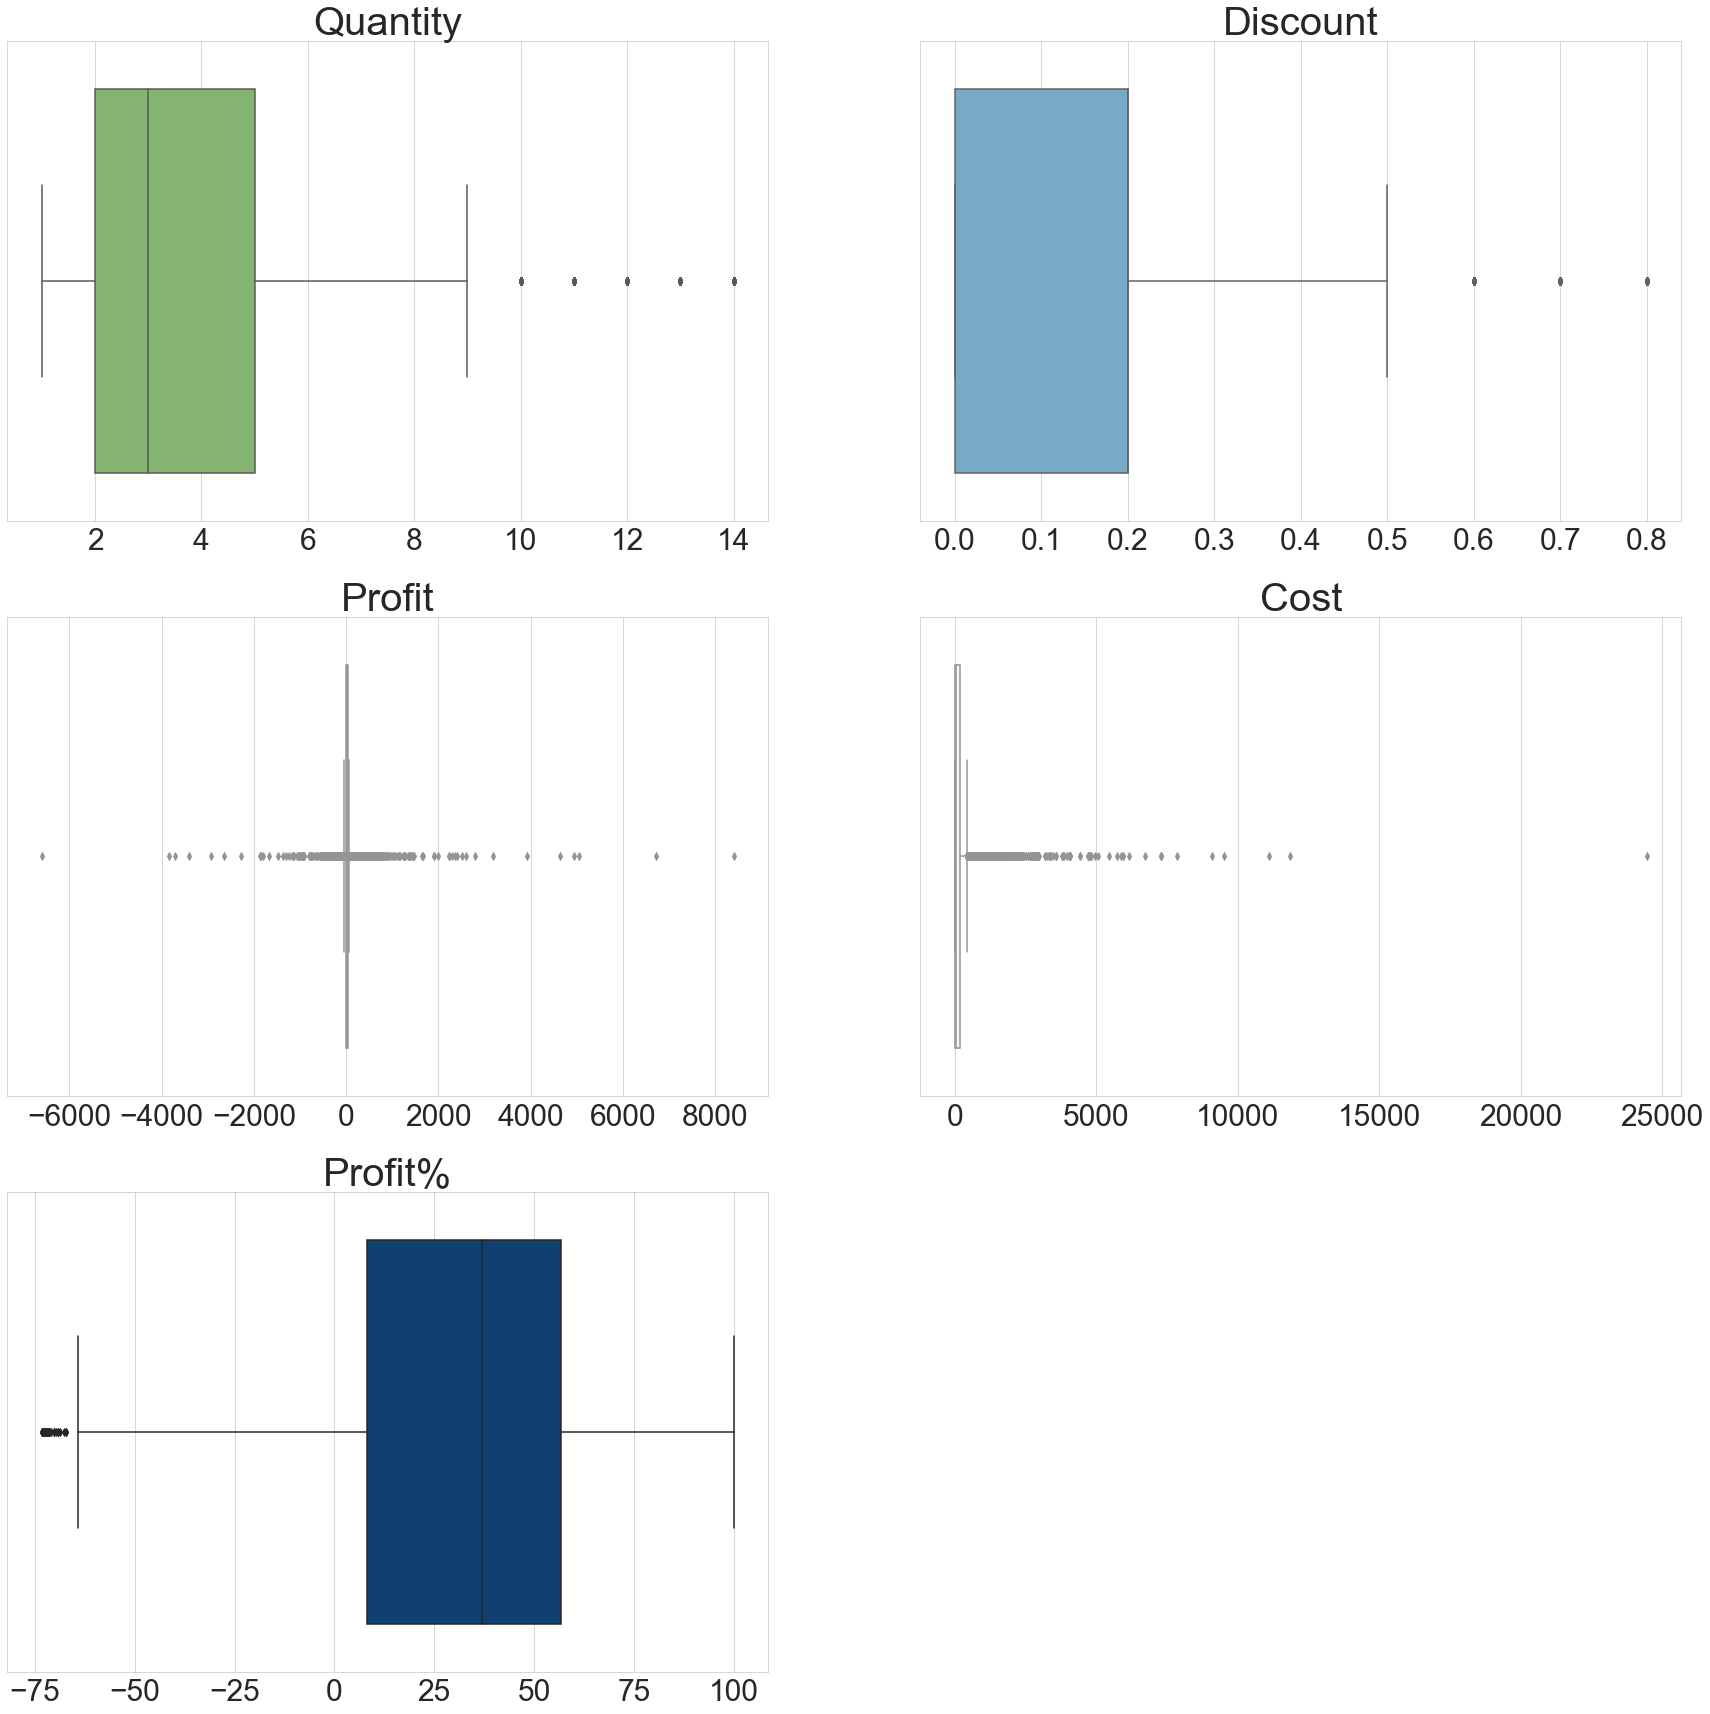

In [11]:
plt.figure(figsize=(30,30))
for i,j in enumerate(retail1.dtypes[retail.dtypes!='object'].index[1:]):
    plt.subplots_adjust(hspace=0.2,wspace=0.2)
    plt.subplot(3,2,i+1)
    sns.boxplot(data=retail,x=j,palette=rd.choice(palette))
    plt.title(j.title(),fontsize=40)
    plt.xticks(fontsize=30)
    plt.xlabel(xlabel=None)
plt.show()

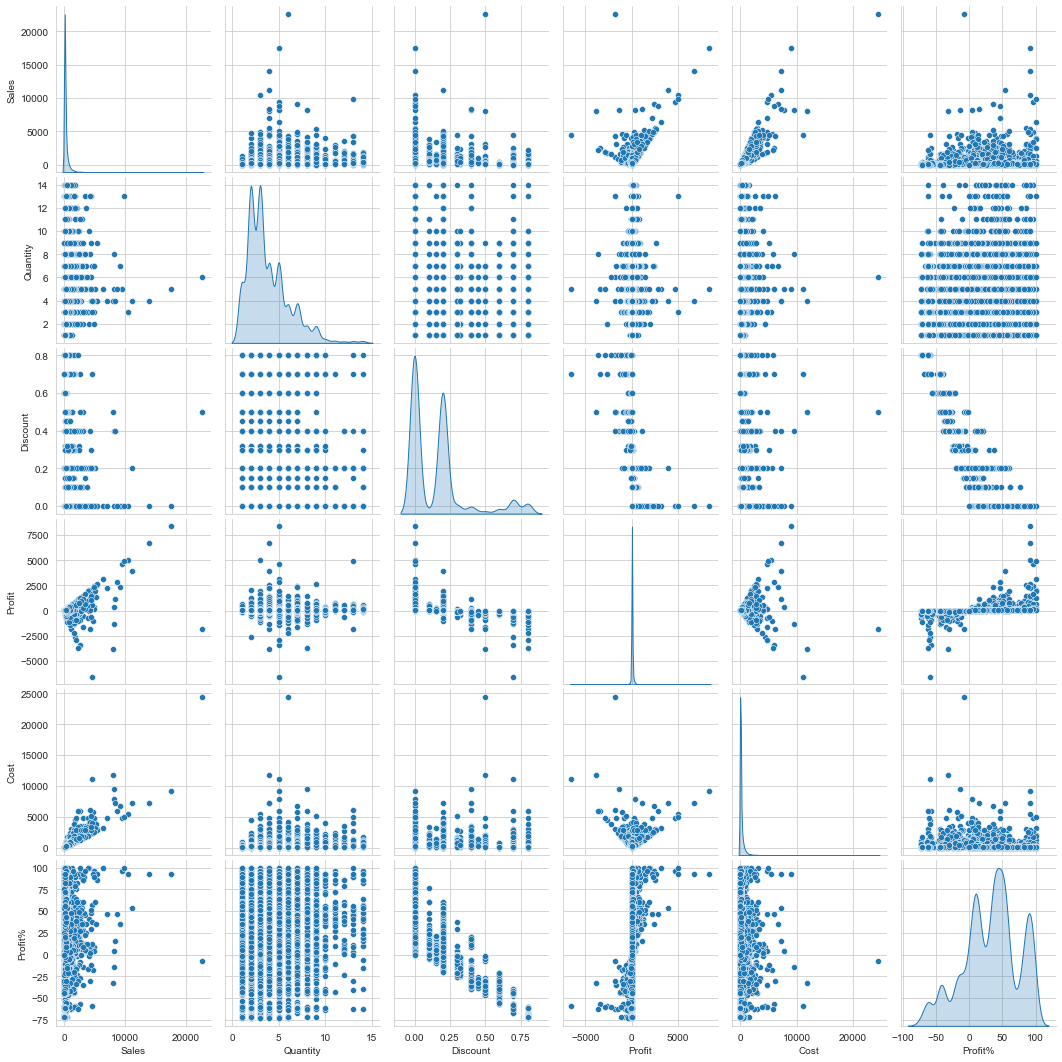

In [12]:
# Plotting the pairplot
sns.pairplot(retail1[retail1.dtypes[retail.dtypes!='object'].index],diag_kind='kde')
plt.show()

# Univariate Analysis

In [13]:
# Making the categorical column for profit % column
retail1['Profit%_c']=pd.cut(retail1['Profit%'],bins=[-100,0,25,50,75,100],labels=['<0','0-25','25-50','50-75','75+'])
retail1.head()

Ship Mode    Segment             City       State Region  \
0    Second Class   Consumer        Henderson    Kentucky  South   
1    Second Class   Consumer        Henderson    Kentucky  South   
2    Second Class  Corporate      Los Angeles  California   West   
3  Standard Class   Consumer  Fort Lauderdale     Florida  South   
4  Standard Class   Consumer  Fort Lauderdale     Florida  South   

          Category Sub-Category     Sales  Quantity  Discount    Profit  \
0        Furniture    Bookcases  261.9600         2      0.00   41.9136   
1        Furniture       Chairs  731.9400         3      0.00  219.5820   
2  Office Supplies       Labels   14.6200         2      0.00    6.8714   
3        Furniture       Tables  957.5775         5      0.45 -383.0310   
4  Office Supplies      Storage   22.3680         2      0.20    2.5164   

        Cost    Profit% Profit%_c  
0   220.0464  19.047619      0-25  
1   512.3580  42.857143     25-50  
2     7.7486  88.679245       75+  
3  1340.6085 -28.571429        <0  
4    19.8516  12.676056      0-25

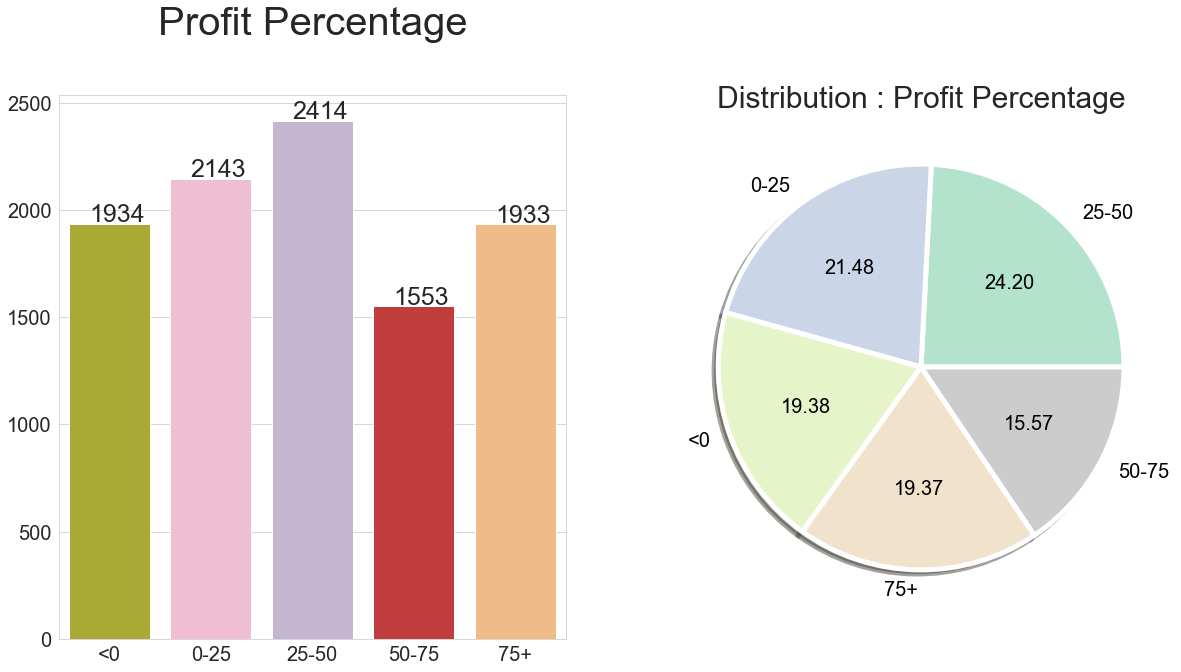

In [14]:
# Profit Percentage Check
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax=sns.countplot(data=retail1,x='Profit%_c',palette=rd.choice(palette))
for i in ax.patches:
    ax.annotate(str(i.get_height()),(i.get_x()+i.get_width()/4,i.get_height()*1.005),fontsize=25)
plt.title('Profit Percentage',fontsize=40,y=1.1)
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(1,2,2)
bx = (retail1['Profit%_c'].value_counts(normalize=True)*100)
bx.plot(kind='pie',autopct='%.2f',labels=bx.index
        ,shadow=True,textprops={'fontsize':20,'color':'black'},wedgeprops={'linewidth':5},cmap='Pastel2')
plt.title(f'Distribution : Profit Percentage',fontsize=30)
plt.ylabel(ylabel=None)
plt.show()

### <font color='purple'>Comment :</font>

- We can see from the above plot that Profit percentage between 25-50 is the highest. So, it means that the company is earning the most with this profit status. But there are still weak areas as the negative profit percentages (loss) is 20%.

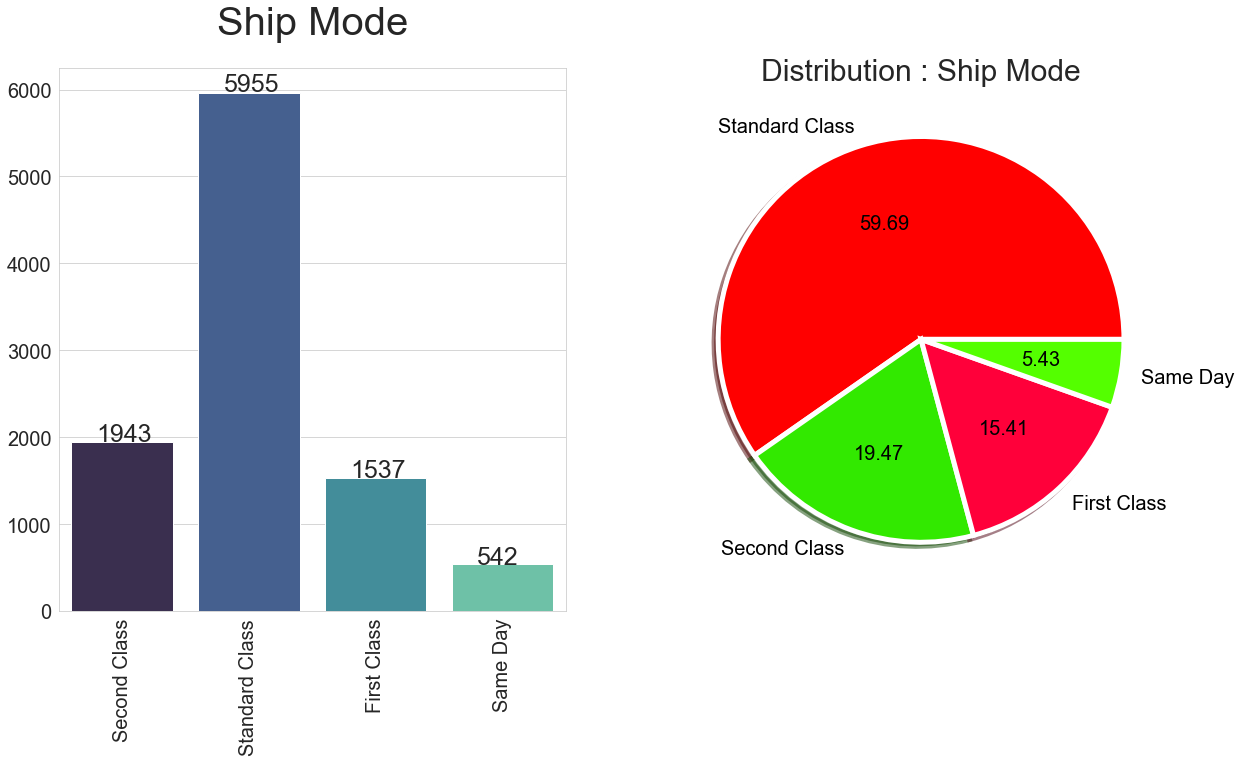

In [15]:
# Ship Mode column

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax=sns.countplot(data=retail1,x='Ship Mode',palette=rd.choice(palette))
for i in ax.patches:
    ax.annotate(str(i.get_height()),(i.get_x()+i.get_width()/4,i.get_height()*1.005),fontsize=25)
plt.title('Ship Mode',fontsize=40,y=1.05)
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)


plt.subplot(1,2,2)
bx = (retail1['Ship Mode'].value_counts(normalize=True)*100)
bx.plot(kind='pie',autopct='%.2f',labels=bx.index
        ,shadow=True,textprops={'fontsize':20,'color':'black'},wedgeprops={'linewidth':5},cmap=rd.choice(cmap))
plt.title(f'Distribution : Ship Mode',fontsize=30)
plt.ylabel(ylabel=None)
plt.show()

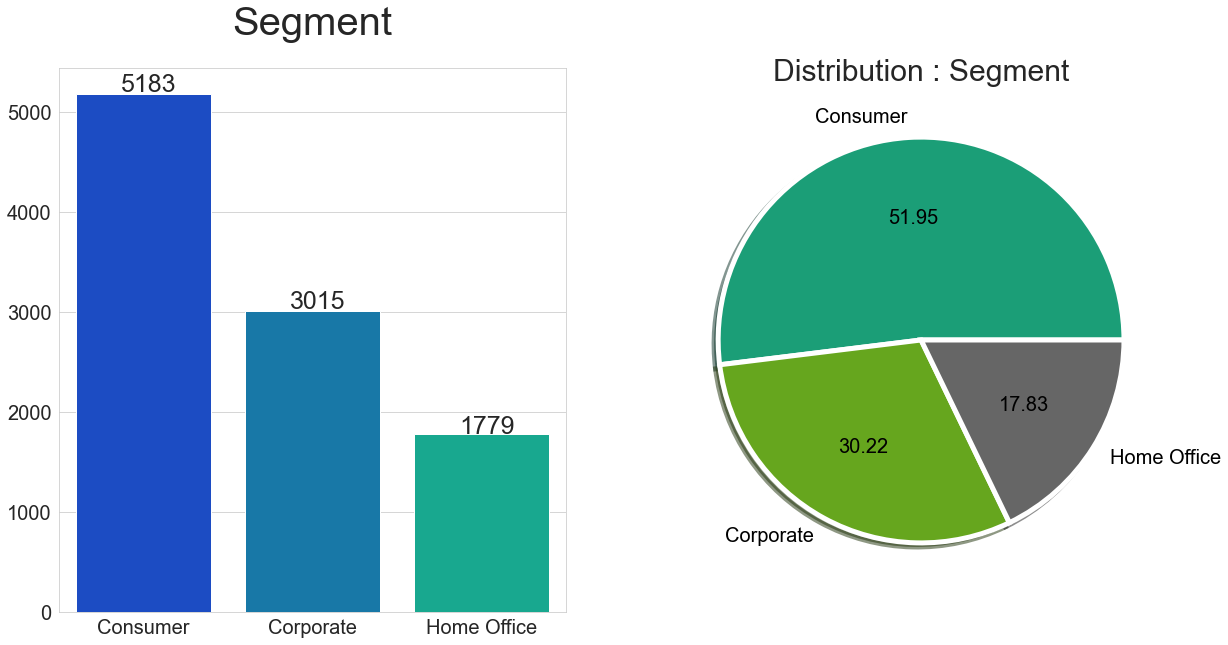

In [16]:
# Segment Column
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax=sns.countplot(data=retail1,x='Segment',palette=rd.choice(palette))
for i in ax.patches:
    ax.annotate(str(i.get_height()),(i.get_x()+i.get_width()/3,i.get_height()*1.005),fontsize=25)
plt.title('Segment',fontsize=40,y=1.05)
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(1,2,2)
bx = (retail1['Segment'].value_counts(normalize=True)*100)
bx.plot(kind='pie',autopct='%.2f',labels=bx.index
        ,shadow=True,textprops={'fontsize':20,'color':'black'},wedgeprops={'linewidth':5},cmap='Dark2')
plt.title(f'Distribution : Segment',fontsize=30)
plt.ylabel(ylabel=None)
plt.show()

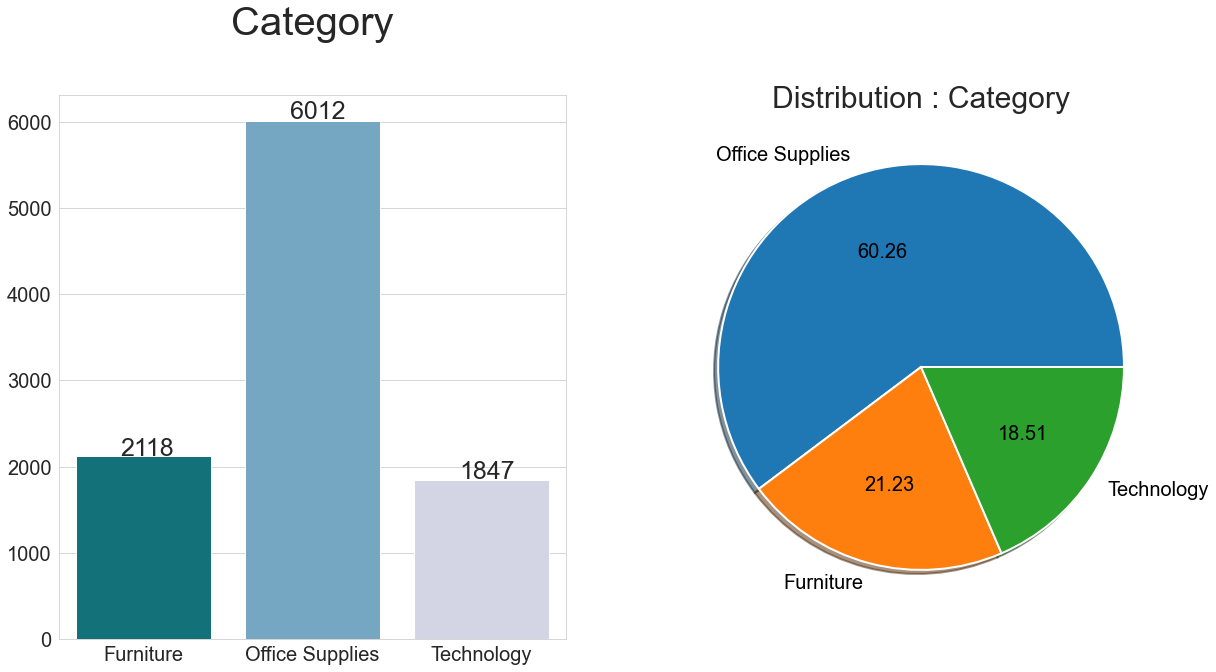

In [17]:
# Category column
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax=sns.countplot(data=retail1,x='Category',palette=rd.choice(palette))
for i in ax.patches:
    ax.annotate(str(i.get_height()),(i.get_x()+i.get_width()/3,i.get_height()*1.005),fontsize=25)
plt.title('Category',fontsize=40,y=1.1)
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(1,2,2)
bx = (retail1['Category'].value_counts(normalize=True)*100)
bx.plot(kind='pie',autopct='%.2f',labels=bx.index
        ,shadow=True,textprops={'fontsize':20,'color':'black'},wedgeprops={'linewidth':2})
plt.title(f'Distribution : Category',fontsize=30)
plt.ylabel(ylabel=None)
plt.show()

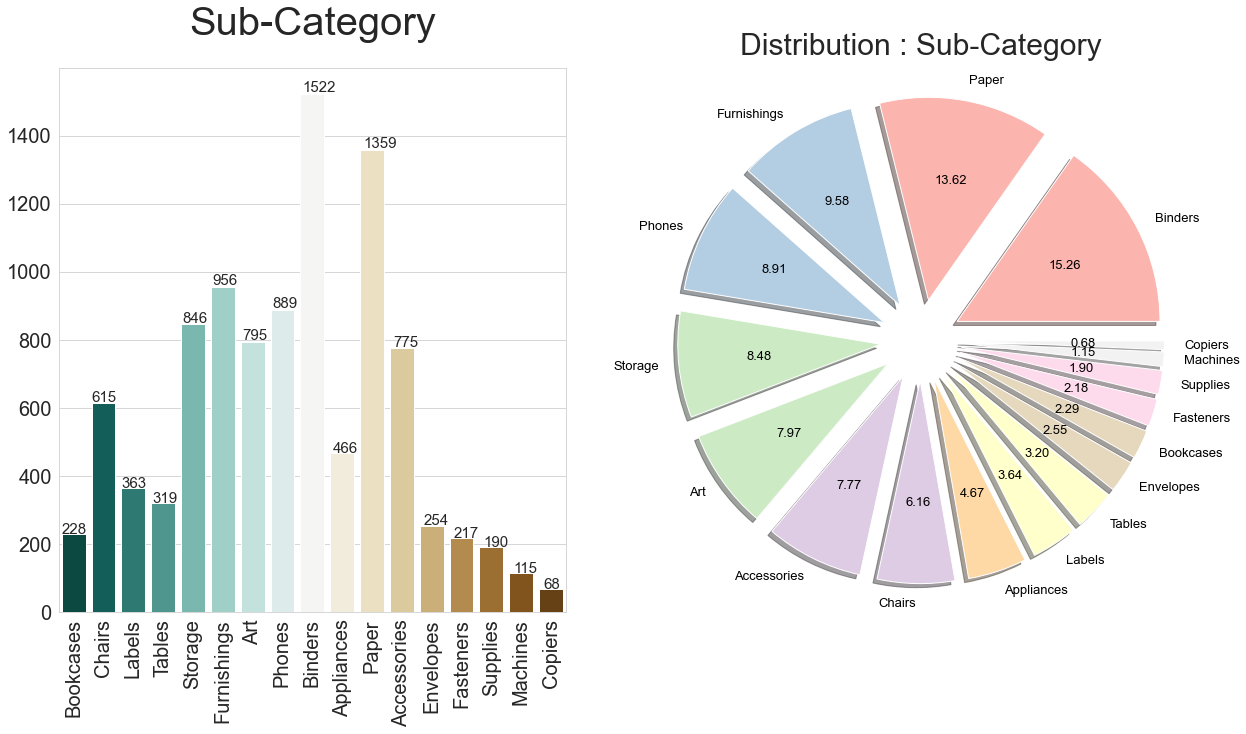

In [18]:
# Sub- Category column
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax=sns.countplot(data=retail1,x='Sub-Category',palette=rd.choice(palette))
for i in ax.patches:
    ax.annotate(str(i.get_height()),(i.get_x()*1.01,i.get_height()*1.005),fontsize=15)
plt.title('Sub-Category',fontsize=40,y=1.05)
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)

plt.subplot(1,2,2)
bx = (retail1['Sub-Category'].value_counts(normalize=True)*100)
bx.plot(kind='pie',autopct='%.2f',labels=bx.index,explode = [0.2 for i in range(len(retail1['Sub-Category'].value_counts().index))]
        ,shadow=True,textprops={'fontsize':13,'color':'black'},wedgeprops={'linewidth':1},cmap='Pastel1')
plt.title(f'Distribution : Sub-Category',fontsize=30,y=1.05)
plt.ylabel(ylabel=None)
plt.show()

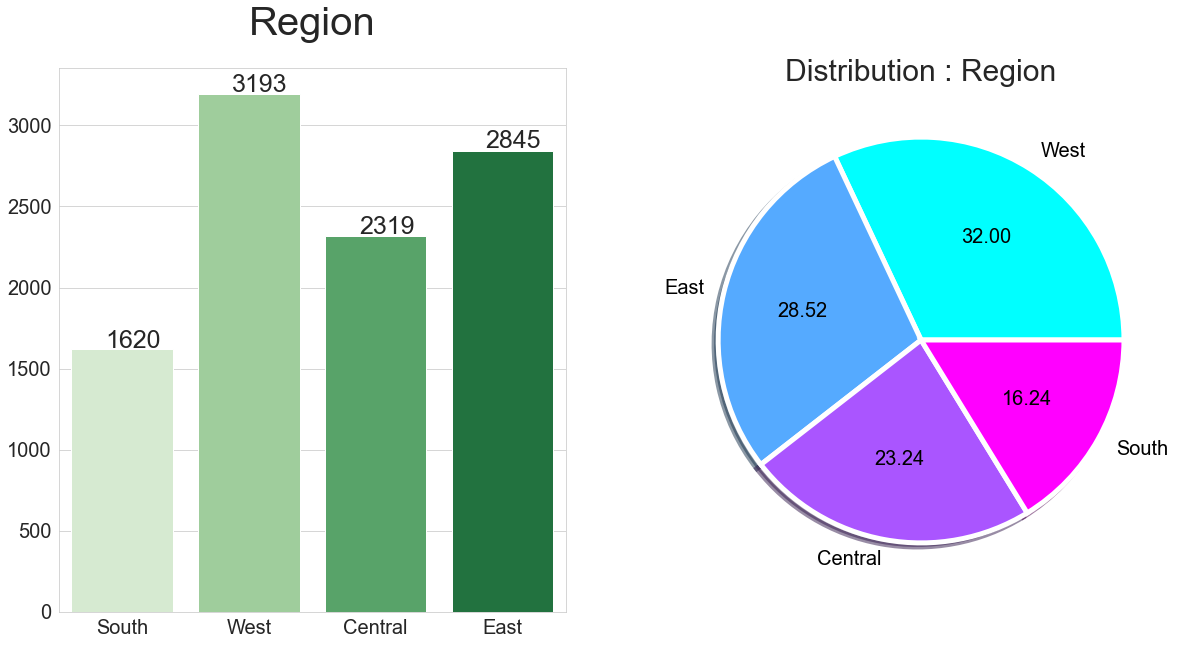

In [19]:
# Region column
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax=sns.countplot(data=retail1,x='Region',palette=rd.choice(palette),)
for i in ax.patches:
    ax.annotate(str(i.get_height()),(i.get_x()+i.get_width()/3,i.get_height()*1.005),fontsize=25)
plt.title('Region',fontsize=40,y=1.05)
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.subplot(1,2,2)
bx = (retail1['Region'].value_counts(normalize=True)*100)
bx.plot(kind='pie',autopct='%.2f',labels=bx.index
        ,shadow=True,textprops={'fontsize':20,'color':'black'},wedgeprops={'linewidth':5},cmap='cool')
plt.title(f'Distribution : Region',fontsize=30)
plt.ylabel(ylabel=None)
plt.show()

### <font color='purple'>Comment : </font>
- West region has the highest number of orders.

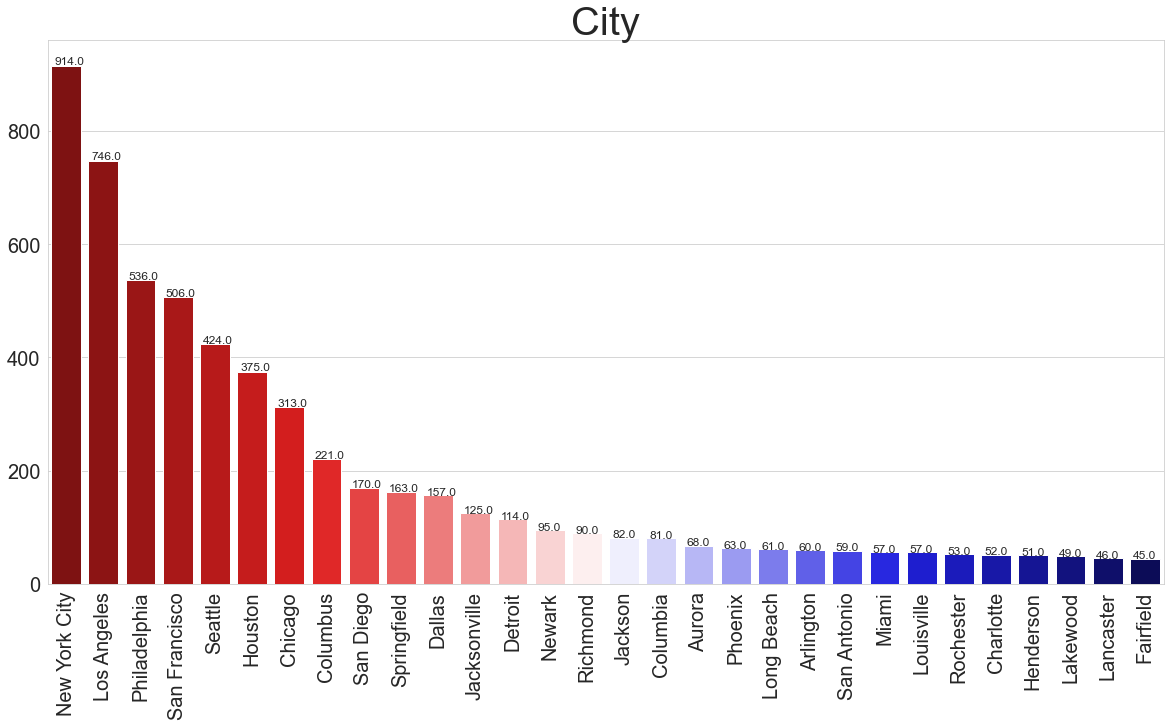

In [20]:
# City Column
plt.figure(figsize=(20,10))
ax=sns.barplot(x=retail1['City'].value_counts().head(30).index,y=retail1['City'].value_counts().head(30),palette=rd.choice(palette),)
for i in ax.patches:
    ax.annotate(str(i.get_height()),(i.get_x()+i.get_width()/10,i.get_height()*1.005),fontsize=12)
plt.title('City',fontsize=40)
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.show()

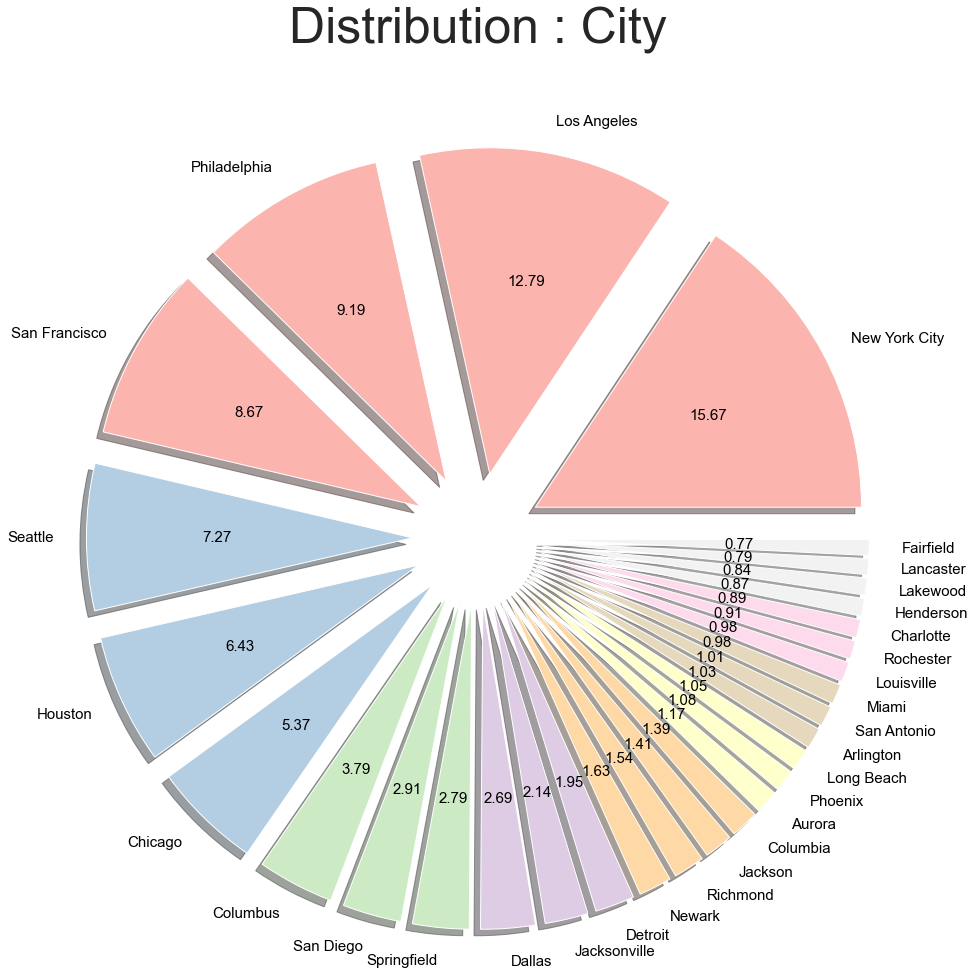

In [21]:
# Distribution of city column
plt.figure(figsize=(15,15))
bx = (retail1['City'].value_counts(normalize=True)*100).head(30)
bx.plot(kind='pie',autopct='%.2f',labels=bx.index,explode=[0.2 for i in range(len(retail1['City'].value_counts().head(30).index))]
        ,shadow=True,textprops={'fontsize':15,'color':'black'},wedgeprops={'linewidth':1},cmap=rd.choice(cmap))
plt.title(f'Distribution : City',fontsize=50,y=1.1)
plt.ylabel(ylabel=None)
plt.show()

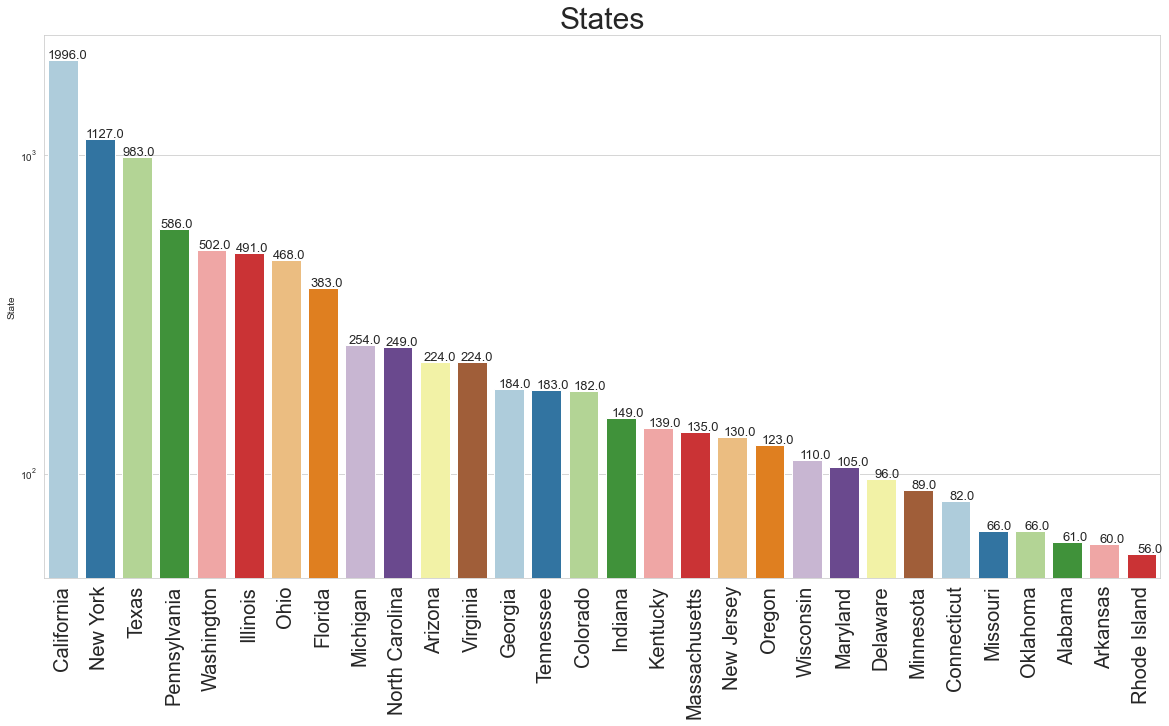

In [22]:
# States column
plt.figure(figsize=(20,10))
ax = sns.barplot(x=retail1['State'].value_counts().head(30).index,
                 y=retail1['State'].value_counts().head(30),palette=rd.choice(palette))
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x()*1.01,i.get_height()*1.01),fontsize=13)
plt.xticks(rotation=90,fontsize=20)
plt.title('States',fontsize=30)
plt.yscale('log')
plt.show()

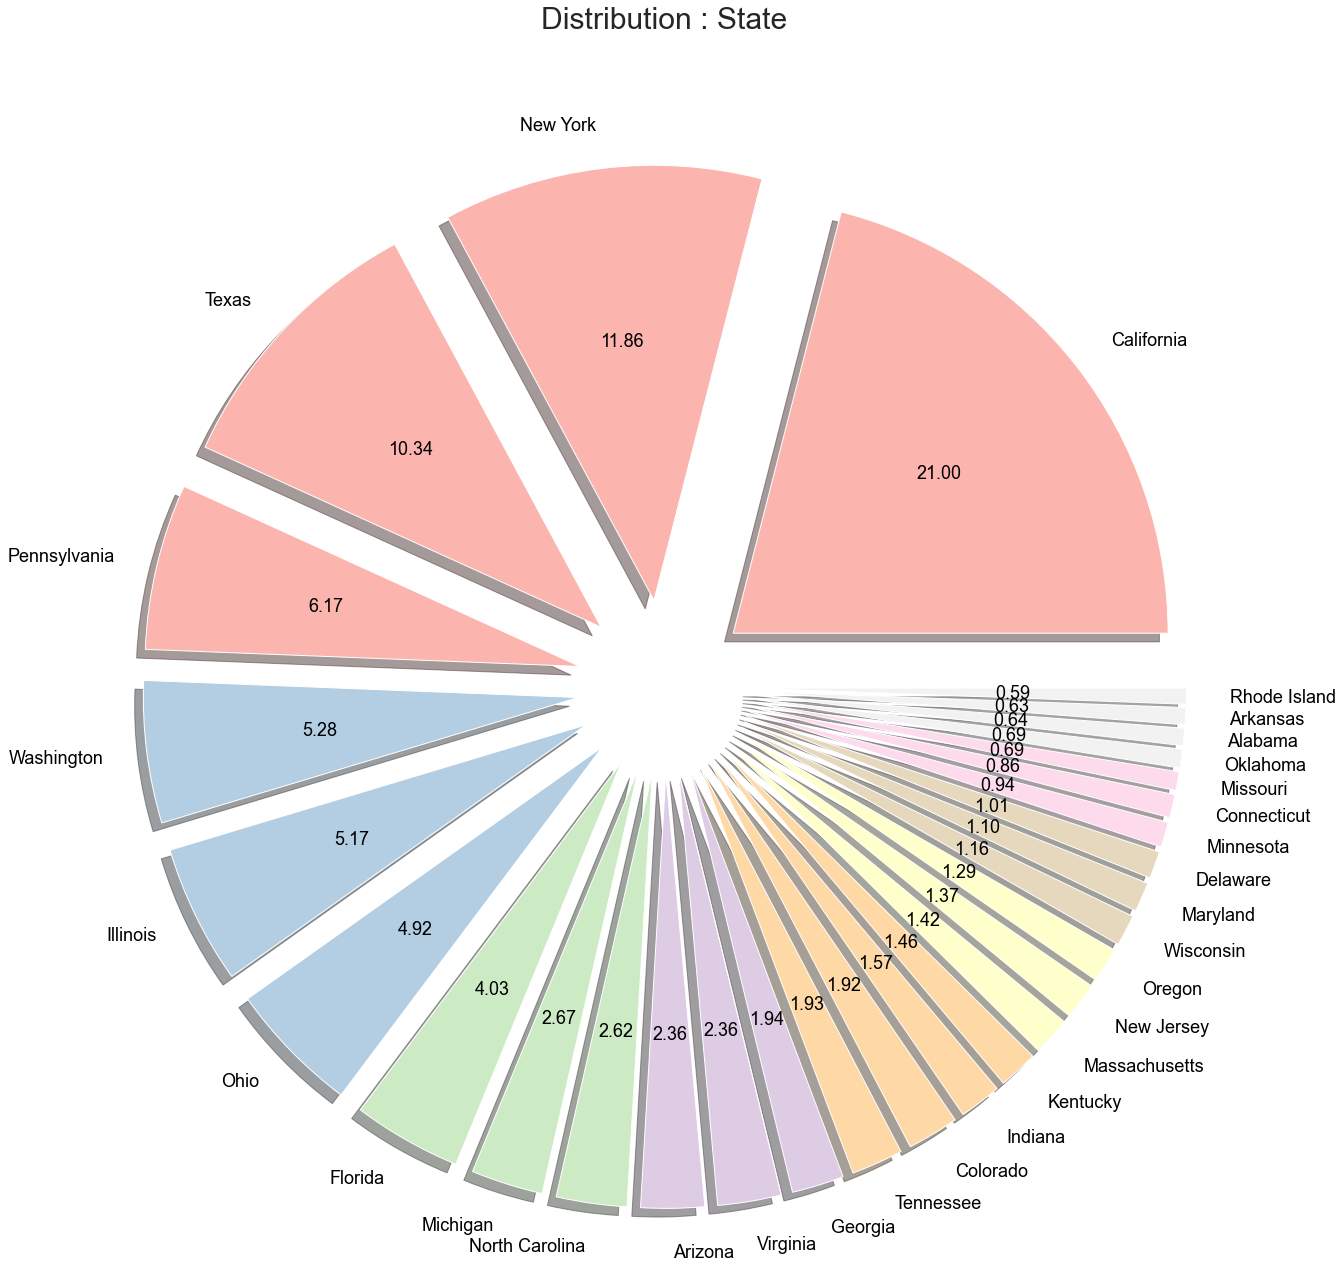

In [23]:
# Distribution of State column
plt.figure(figsize=(20,20))
bx = (retail1['State'].value_counts(normalize=True)*100).head(30)
bx.plot(kind='pie',autopct='%.2f',labels=bx.index,explode=[0.2 for i in range(len(retail1['State'].value_counts().head(30).index))]
        ,shadow=True,textprops={'fontsize':18,'color':'black'},wedgeprops={'linewidth':1},cmap='Pastel1')
plt.title(f'Distribution : State',fontsize=30,y=1.1)
plt.ylabel(ylabel=None)
plt.show()

### <font color='purple'>Comment :</font>
- California has the highest number of orders while Wyoming received the lowest number of orders

# Bivariate Analysis

In [24]:
def grpd_analysis(data=None,cat=None,cmap=None,annot=False,agg=None,kind='bar',size=(20,10)):
    a=data.groupby(by=cat)[['Sales','Cost','Profit']].agg(agg)
    
    # Sorting the data via Profit
    a=a.sort_values(by='Profit')
    print(a)
    ax = a.plot(kind=kind,figsize=size,cmap=cmap)
    if annot==True:
        for i in ax.patches:
            ax.annotate(str(round(i.get_height(),2)),(i.get_x()*1.01,i.get_height()*1.01),fontsize=15)
        plt.title(f'{cat} wise Total Sales and Total Profit',fontsize=30)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.yscale('linear')
        plt.legend(fontsize=20)
        plt.show()
        return a
    else:
        plt.title(f'{cat} wise Total Sales and Total Profit',fontsize=30)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.yscale('linear')
        plt.legend(fontsize=20)
        plt.show()
        return ''

                    Sales         Cost      Profit
Sub-Category                                      
Tables        206965.5320  224691.0131 -17725.4811
Bookcases     114879.9963  118352.5523  -3472.5560
Supplies       46673.5380   47862.6375  -1189.0995
Fasteners       3024.2800    2074.7618    949.5182
Machines      189238.6310  185853.8741   3384.7569
Labels         12444.9120    6918.5300   5526.3820
Art            27107.0320   20582.4202   6524.6118
Envelopes      16476.4020    9512.2253   6964.1767
Furnishings    91683.0240   78630.3010  13052.7230
Appliances    107532.1610   89394.1556  18138.0054
Storage       223843.6080  202564.7816  21278.8264
Chairs        327777.7610  301210.6332  26567.1278
Binders       203409.1690  173181.1687  30228.0003
Paper          78224.1420   44279.9025  33944.2395
Accessories   167380.3180  125443.6823  41936.6357
Phones        330007.0540  285491.3234  44515.7306
Copiers       149528.0300   93910.2051  55617.8249


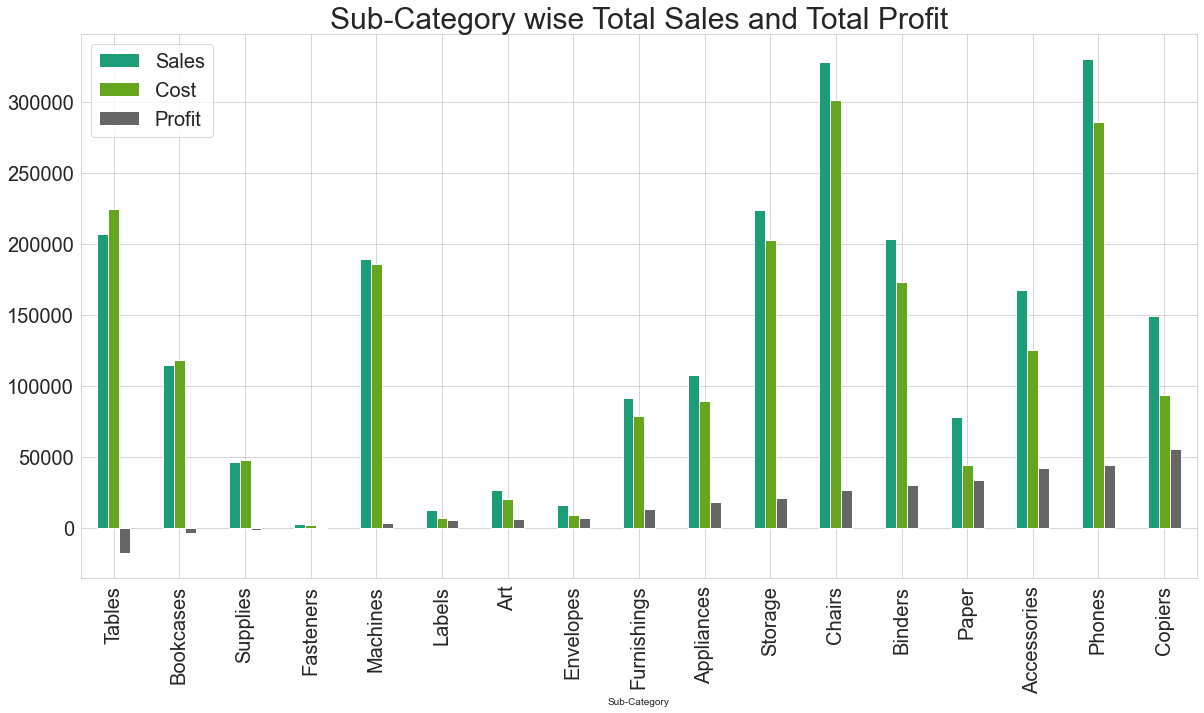

In [25]:
# Sub-category wise total sales and profit
a = grpd_analysis(data=retail1,cat='Sub-Category',cmap='Dark2',agg='sum')

                            Sales         Cost      Profit
State                                                     
Texas                 170124.5418  195875.5251 -25750.9833
Ohio                   77976.7640   94936.0818 -16959.3178
Pennsylvania          116496.3620  132061.7655 -15565.4035
Illinois               80162.5370   92764.1870 -12601.6500
North Carolina         55603.1640   63094.0762  -7490.9122
Colorado               32108.1180   38635.9759  -6527.8579
Tennessee              30661.8730   36003.5666  -5341.6936
Arizona                35282.0010   38709.9256  -3427.9246
Florida                89473.7080   92873.0097  -3399.3017
Oregon                 17420.7820   18614.8813  -1194.0993
Wyoming                 1603.1360    1502.9400    100.1960
West Virginia           1209.8240    1023.9024    185.9216
North Dakota             919.9100     689.7603    230.1497
South Dakota            1315.5600     920.7317    394.8283
Maine                   1270.5300     816.0438    454.48

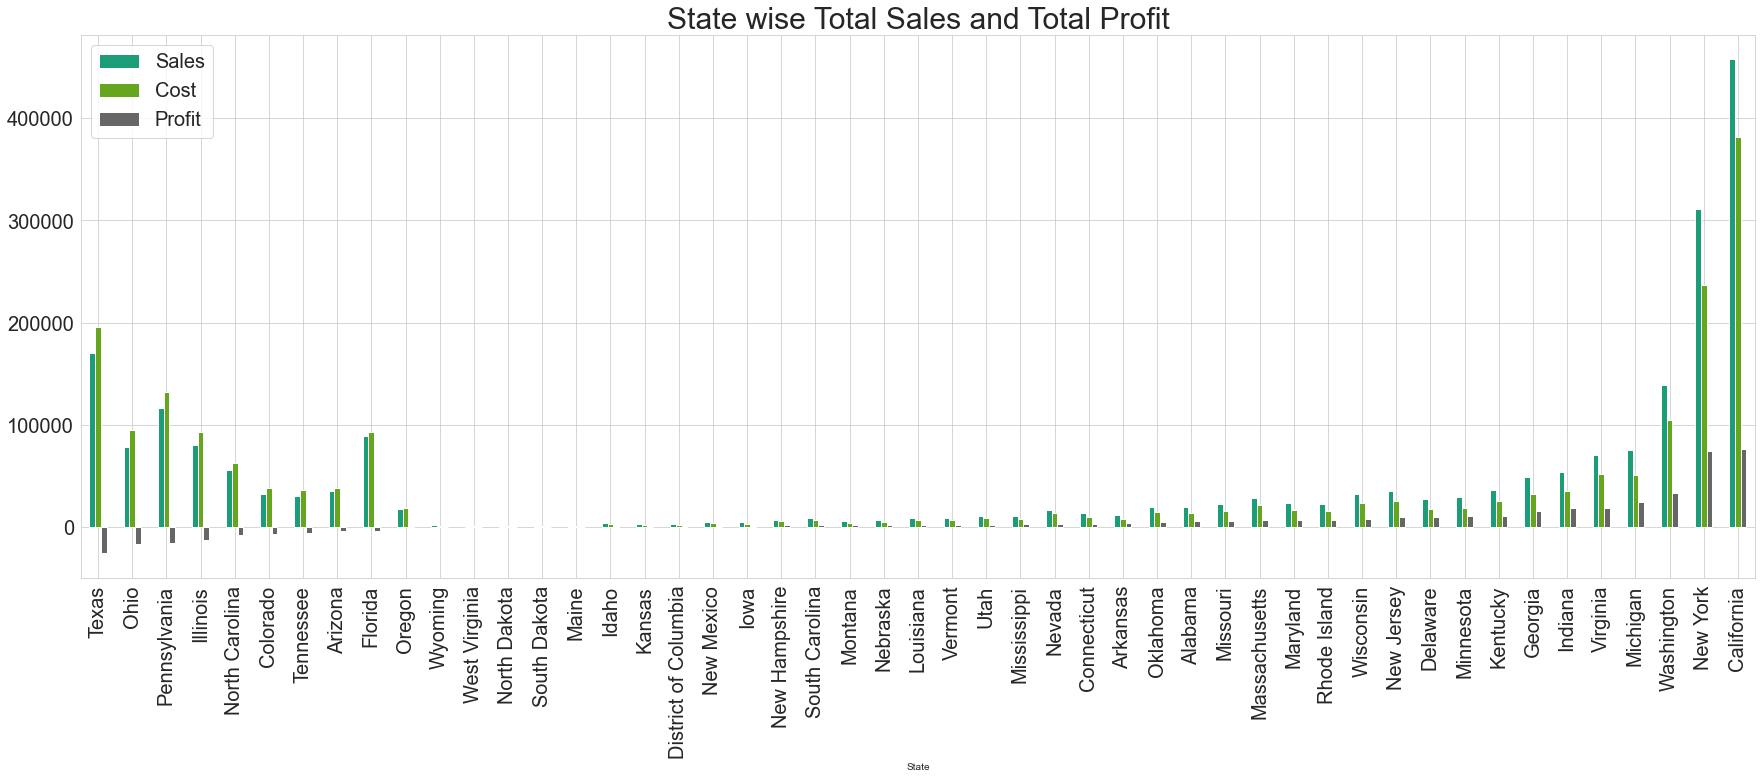

In [26]:
# State wise total sales and profit
a= grpd_analysis(data=retail1,cat='State',cmap='Dark2',agg='sum',kind='bar',size=(30,10))

### <font color='purple'>Comment :</font>
- We can see from the graphs that many states have purchased the products at a price lower than the cost prices and hence the store is incurring huge losses from these states. States like TEXAS,Pensylvania,illonis etc fall under this category.

- Some countries like California has the highest total sales and it seems to be giving low profits even after the selling price is higher than the cost price so most probably due to higher discount rates this issue is being faced by the store.

               Sales         Cost       Profit
Region                                        
Central  500782.8528  461126.9776   39655.8752
South    391721.9050  344972.4747   46749.4303
East     678435.1960  586928.8868   91506.3092
West     725255.6365  616925.8286  108329.8079


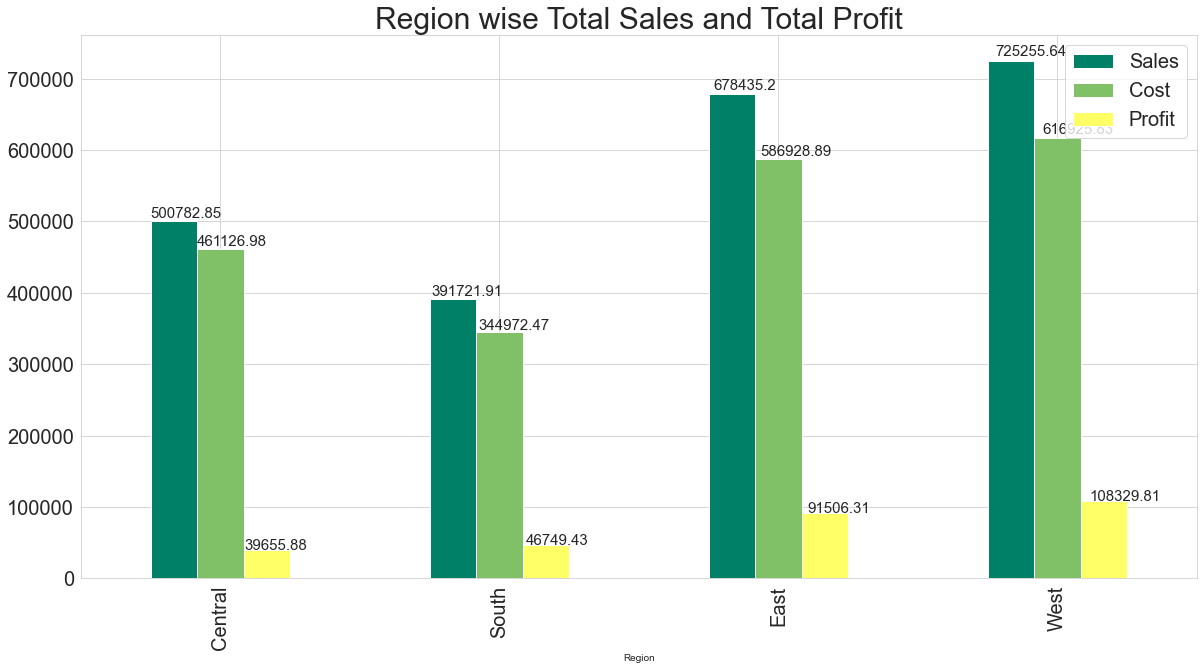

In [27]:
# Region wise total sales and profit
a=grpd_analysis(data=retail1,cat='Region',cmap='summer',annot=True,agg='sum')

### <font color='purple'>Comment : </font>

- Regions such as west and east are having a descent ratio between the product's selling price and cost price but still making the less profits.

- Regions such as Central and south have the lowest profits and their selling and cost price ratio is very close too.

                    Sales          Cost       Profit
Segment                                             
Home Office  4.292927e+05  3.690137e+05   60279.0015
Corporate    7.060701e+05  6.141152e+05   91954.9798
Consumer     1.160833e+06  1.026825e+06  134007.4413


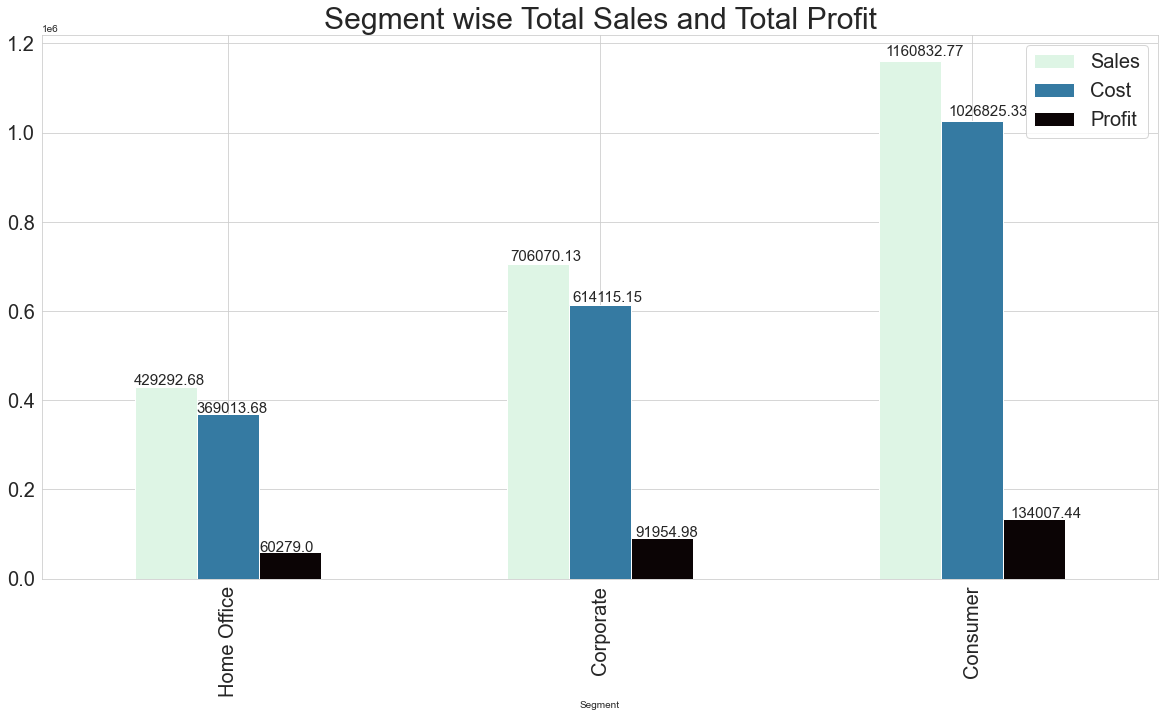

In [28]:
a=grpd_analysis(data=retail1,cat='Segment',annot=True,agg=sum,cmap='mako_r')

### <font color='purple'>Comment :</font>
-  We can see from the graph that the consumer segment has the highest total sales but the profits are very low.
- Home Office segment is making the lowest profits.

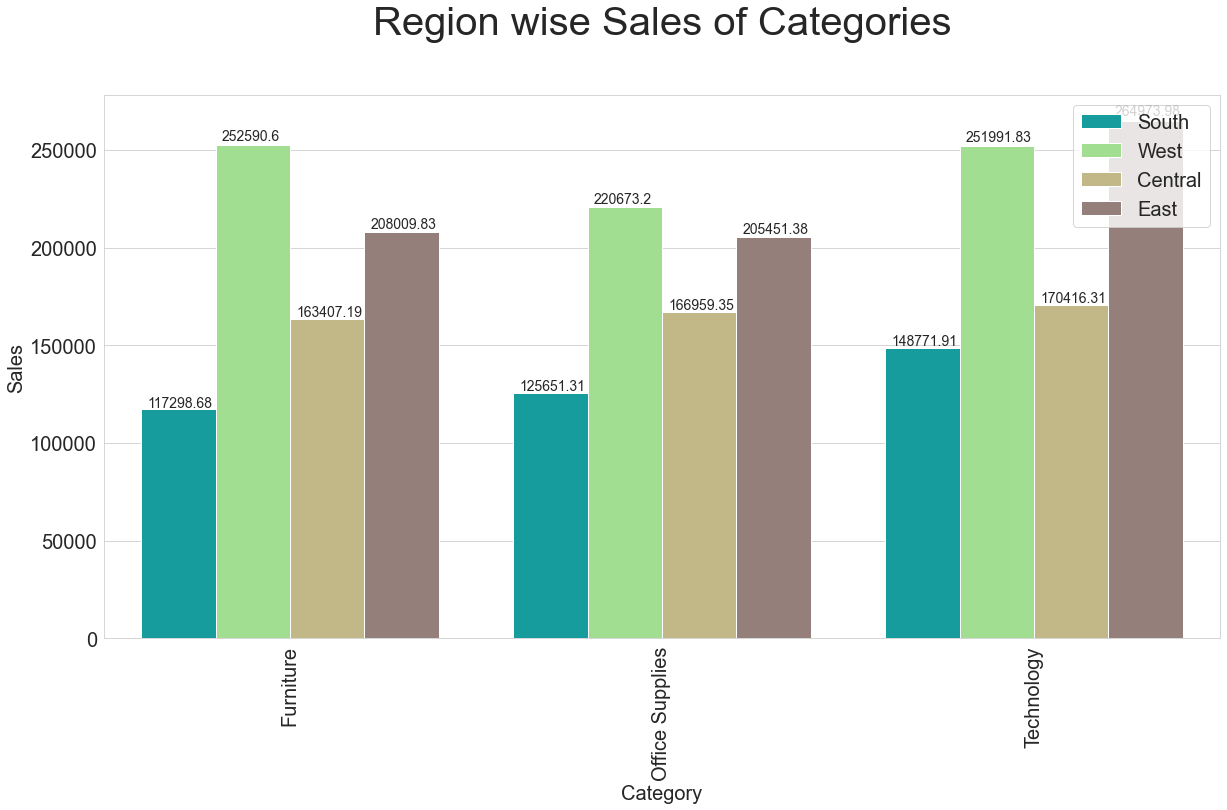

In [29]:
# Region wise sales
plt.figure(figsize=(20,10))
ax=sns.barplot(data=retail1,x='Category',y='Sales',hue='Region',palette=rd.choice(palette),ci=None,estimator=sum)
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x()+i.get_width()/12,i.get_height()*1.01),fontsize=14)
plt.title('Region wise Sales of Categories',fontsize=40,y=1.1)
plt.xlabel(xlabel = 'Category',fontsize=20)
plt.ylabel(ylabel = 'Sales',fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.show()

In [30]:
gr = retail1.groupby(by=['Sub-Category','Profit%_c'])['Sales','Profit'].sum()

gr = pd.DataFrame(gr)

gr_0 = gr.groupby(level=0).tail(1)

gr_1 = gr.groupby(level=0).head(1)

gr_0.reset_index(inplace=True)

gr_1.reset_index(inplace=True)
gr_1.sort_values(by='Profit',ascending=False,inplace=True)
gr_0.sort_values(by='Profit',ascending=False,inplace=True)

gr_1

Sub-Category Profit%_c        Sales      Profit
8     Fasteners        <0     183.6900    -33.1952
0   Accessories        <0   10983.4720   -930.6265
15     Supplies        <0   14067.1760  -3015.6219
14      Storage        <0   46284.2700  -6426.3038
9   Furnishings        <0   14808.6200  -6490.9134
13       Phones        <0   36013.1600  -7530.6235
1    Appliances        <0    3382.5340  -8629.6412
5        Chairs        <0  107297.5900  -9868.7825
4     Bookcases        <0   48513.0528 -12152.2060
11     Machines        <0   72456.2530 -30118.6682
16       Tables        <0  105982.1990 -32412.1483
3       Binders        <0   36137.0490 -38504.2594
2           Art        <0          NaN         NaN
6       Copiers        <0          NaN         NaN
7     Envelopes        <0          NaN         NaN
10       Labels        <0          NaN         NaN
12        Paper        <0          NaN         NaN

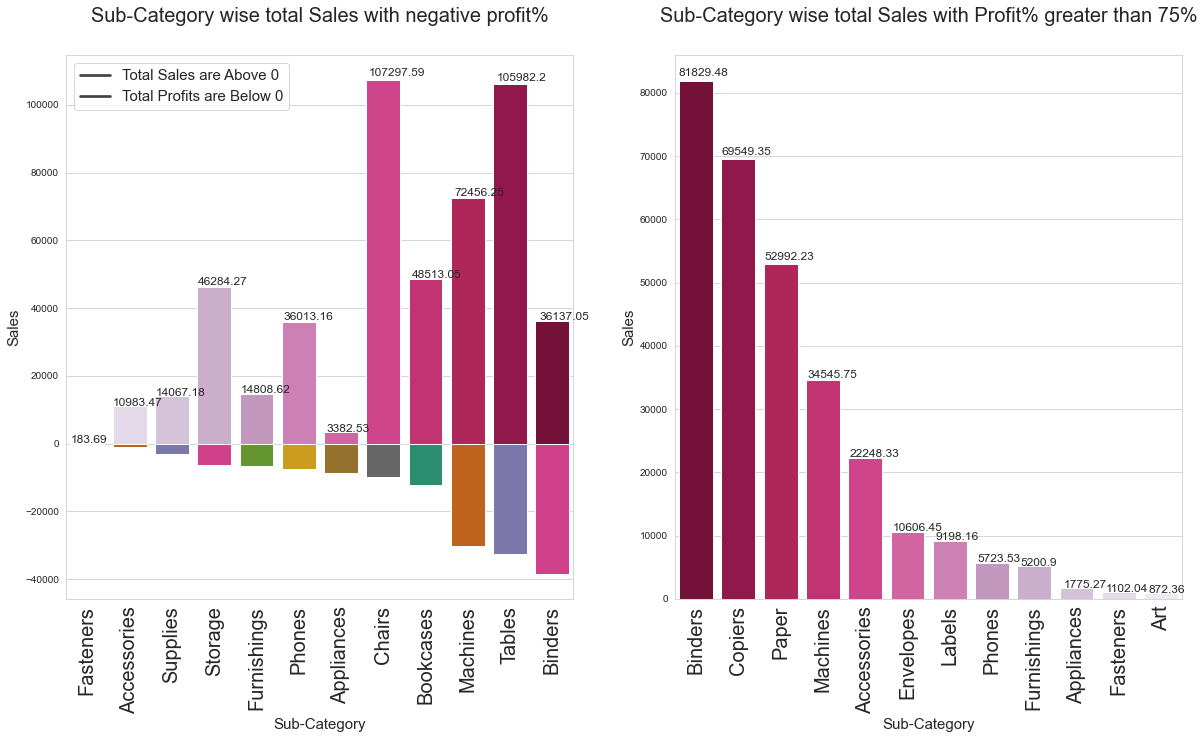

In [31]:
# Sales of the product sub categories with both negative and highest profit
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

# Sales
ax=sns.barplot(data=gr_1.dropna(),y='Sales',x='Sub-Category',palette=rd.choice(palette))

for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x()*1.01,i.get_height()*1.01),fontsize=12)
    

# Profit
ax1= sns.barplot(data=gr_1.dropna(),y='Profit',x='Sub-Category',palette='Dark2')
plt.xticks(rotation=90,fontsize=20)
plt.xlabel(xlabel='Sub-Category',fontsize=15)
plt.ylabel(ylabel='Sales',fontsize=15)
# plt.yscale('log')
plt.title('Sub-Category wise total Sales with negative profit%',fontsize=20,y=1.05)
plt.legend(['Total Sales are Above 0','Total Profits are Below 0'],fontsize=15,loc='upper left')


plt.subplot(1,2,2)
ax=sns.barplot(data=gr_0.dropna(),y='Sales',x='Sub-Category',palette=rd.choice(palette))
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x()*1.01,i.get_height()*1.01),fontsize=12)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel(xlabel='Sub-Category',fontsize=15)
plt.ylabel(ylabel='Sales',fontsize=15)
# plt.yscale('log')
plt.title('Sub-Category wise total Sales with Profit% greater than 75%',fontsize=20,y=1.05)

plt.show()

### <font color='purple'>Comment :</font>
- From the right plot we can see that Binders, Copiers are the best selling categories which are making the highest profit in the market.
- From the left plot we can see that Chair and tables have the highest total sales while Binders making the lowest profit followed by tables and machines. Appliance has the second lowest total sales but despite of that it is making a total loss.

In [32]:
gr = retail1.groupby(['Sub-Category','Profit%_c'])['Profit','Quantity'].sum().sort_values('Profit',ascending =True).dropna()
# gr = gr.reset_index()
gr = gr.groupby(level=0).head(1)
gr.reset_index(inplace=True)
gr = gr[gr['Profit%_c']=='<0']
gr

Sub-Category Profit%_c      Profit  Quantity
0       Binders        <0 -38504.2594    2453.0
1        Tables        <0 -32412.1483     766.0
2      Machines        <0 -30118.6682     157.0
3     Bookcases        <0 -12152.2060     428.0
4        Chairs        <0  -9868.7825     958.0
5    Appliances        <0  -8629.6412     235.0
6        Phones        <0  -7530.6235     492.0
7   Furnishings        <0  -6490.9134     623.0
8       Storage        <0  -6426.3038     664.0
9      Supplies        <0  -3015.6219     110.0
10  Accessories        <0   -930.6265     333.0
11    Fasteners        <0    -33.1952      71.0

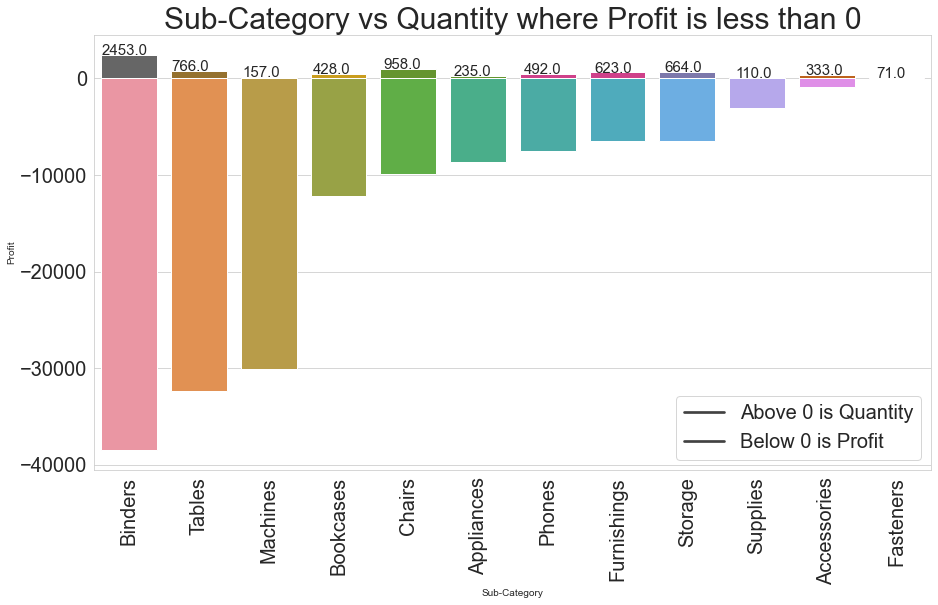

In [33]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=gr,x='Sub-Category',y='Quantity',palette='Dark2_r')
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x()*1.01,i.get_height()*1.01),fontsize=15)
ax1=sns.barplot(data=gr,x='Sub-Category',y='Profit')

plt.title('Sub-Category vs Quantity where Profit is less than 0',fontsize=30)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.legend(labels=['Above 0 is Quantity','Below 0 is Profit',],fontsize=20,loc='lower right')
plt.show()

In [34]:
gr = retail1.groupby(by=['Sub-Category','Profit%_c'])['Discount'].mean()

gr = pd.DataFrame(gr)

gr_0 = gr.groupby(level=0).head(1)

gr_1 = gr.groupby(level=1).tail(1)
gr_1.reset_index(inplace=True)

gr_0.reset_index(inplace=True)

gr_0.dropna()

Sub-Category Profit%_c  Discount
0   Accessories        <0  0.200000
1    Appliances        <0  0.800000
3       Binders        <0  0.737908
4     Bookcases        <0  0.346757
5        Chairs        <0  0.260236
8     Fasteners        <0  0.141176
9   Furnishings        <0  0.513636
11     Machines        <0  0.581818
13       Phones        <0  0.337681
14      Storage        <0  0.175135
15     Supplies        <0  0.200000
16       Tables        <0  0.364634

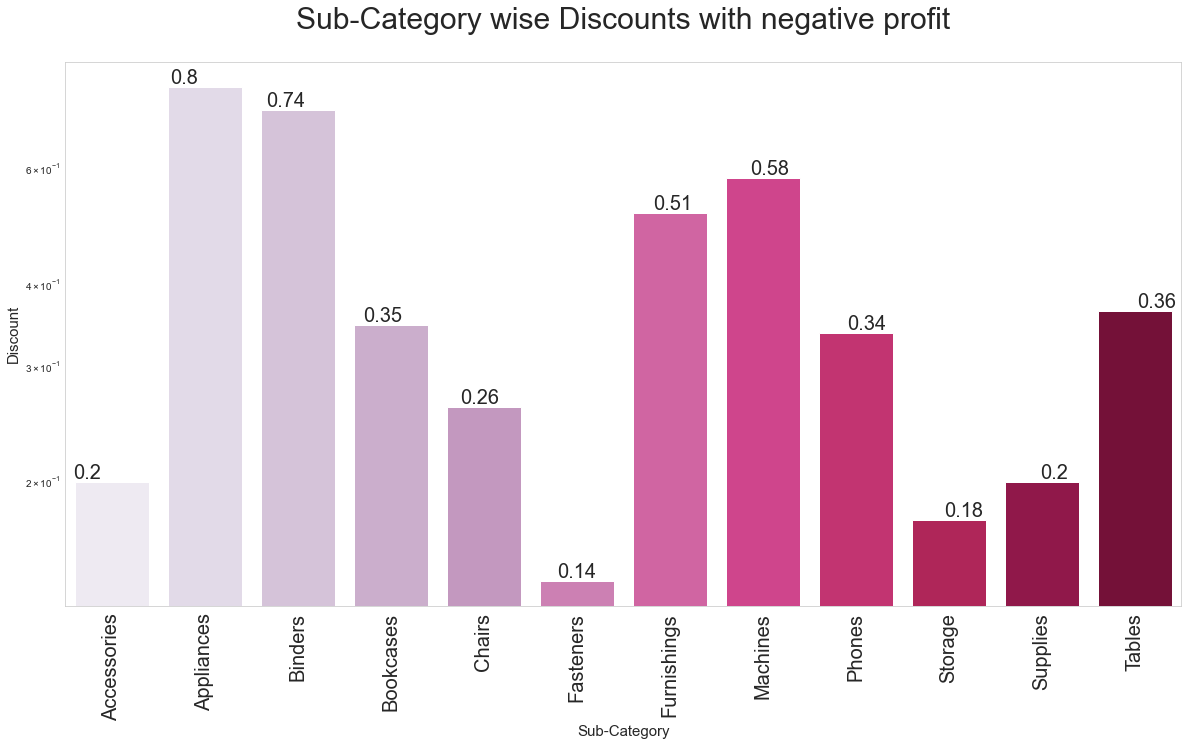

In [35]:
# Discounts on the product sub categories where profit is negative

plt.figure(figsize=(20,10))
ax=sns.barplot(data=gr_0.dropna(),y='Discount',x='Sub-Category',palette=rd.choice(palette))
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x()*1.04,i.get_height()*1.01),fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.yscale('log')
plt.xlabel(xlabel='Sub-Category',fontsize=15)
plt.ylabel(ylabel='Discount',fontsize=15)
plt.title('Sub-Category wise Discounts with negative profit',fontsize=30,y=1.05)
plt.show()

### <font color='purple'>Comment :</font>
- From the above bar graph it can be seen that sub categories like appliances, binders ,furnishings and machines has the dicount rate of more than 50% which means a complete loss. So, the retail company can lower the discount rates in these areas.

In [36]:
gr = retail1.groupby(['City'])['Sales','Profit','Quantity'].sum()
gr.reset_index(inplace=True)
gr.sort_values(['Sales','Profit'],ascending=[False,True],inplace=True)
print(gr[gr.Profit<0].sort_values('Profit',ascending=True))
print('=================================================================')
print(gr[gr.Profit>0].sort_values('Profit',ascending=False))


             City        Sales      Profit  Quantity
374  Philadelphia  109061.4610 -13843.2106      1978
207       Houston   64441.2564 -10175.1755      1460
434   San Antonio   21843.5280  -7299.0502       247
241     Lancaster    9891.4640  -7239.0684       171
80        Chicago   48535.9770  -6648.3318      1129
..            ...          ...         ...       ...
354  Ormond Beach       2.8080     -1.9656         3
370     Pensacola       2.2140     -1.4760         3
140        Elyria       1.8240     -1.3984         1
7         Altoona      20.4510     -1.1835         9
198       Hickory      40.7640     -1.0956         5

[116 rows x 4 columns]
                  City       Sales      Profit  Quantity
329      New York City  256319.041  62013.8973      3413
266        Los Angeles  175831.901  30431.4267      2876
452            Seattle  119460.282  29121.6825      1578
438      San Francisco  112577.172  17466.1186      1920
123            Detroit   42056.974  13146.6935       43

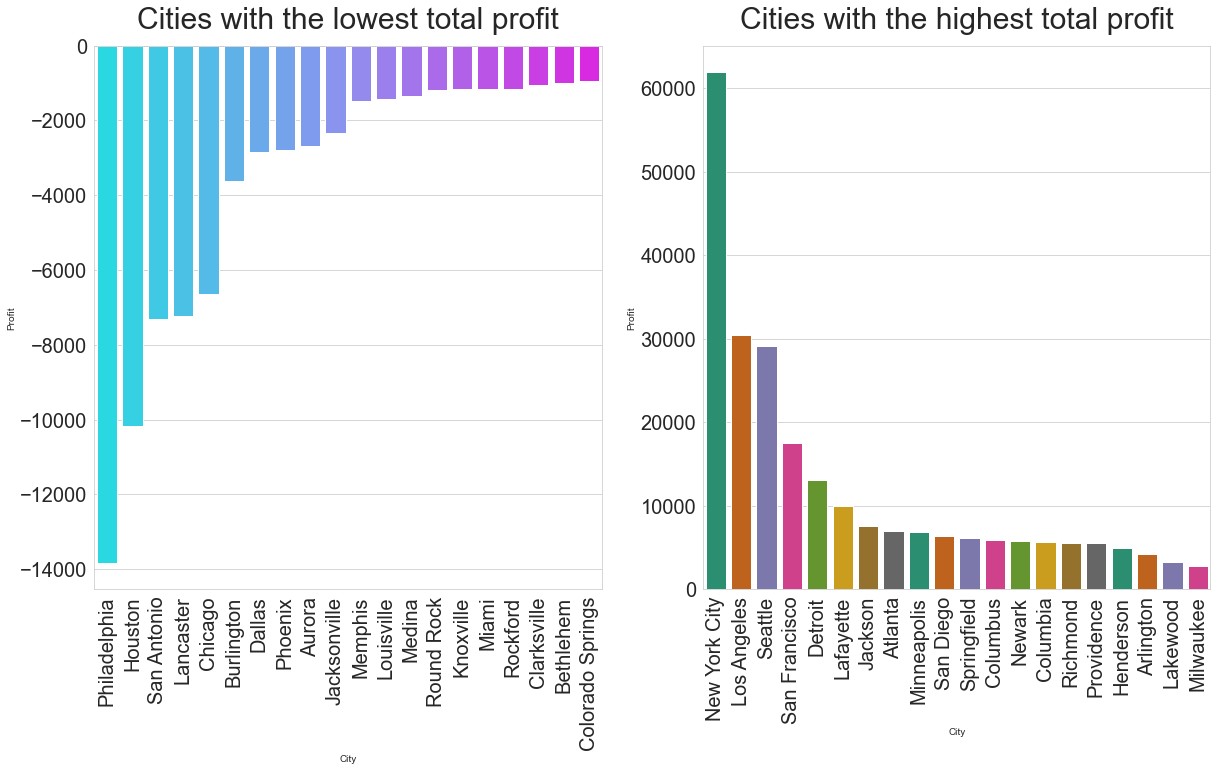

In [37]:
# Cities with the Profit 
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax = sns.barplot(data=gr[gr.Profit<0].sort_values('Profit',ascending=True).head(20),x='City',y='Profit',ci=None,palette='cool')
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cities with the lowest total profit',fontsize=30,y=1.02)
plt.subplot(1,2,2)
ax = sns.barplot(data=gr[gr.Profit>0].sort_values('Profit',ascending=False).head(20),x='City',y='Profit',ci=None,palette='Dark2')
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cities with the highest total profit',fontsize=30,y=1.02)
plt.show()

### <font color='purple'>Comment :</font>

- By looking at the table above we can see that Philadelphia has the highest dicount rate due to which the profits are in highly negative also. And we can visualise the same using the barplot.
- From the graph on the right, NY has the highest profit followed by LA and Seattle

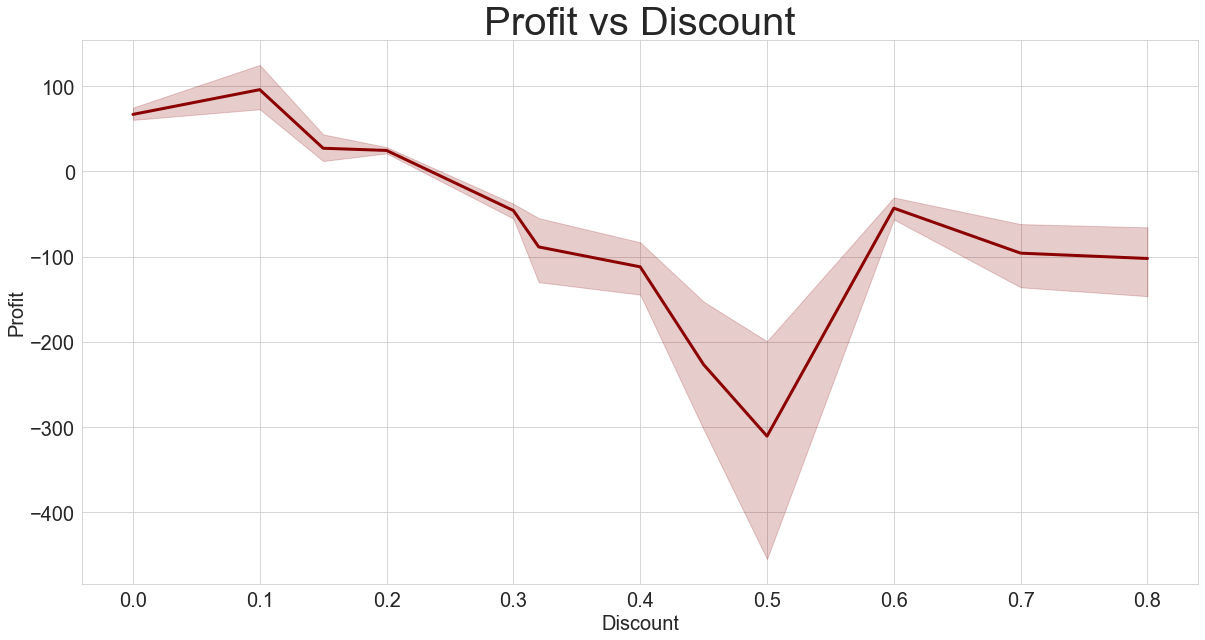

In [38]:
# Profit Vs Discount
plt.figure(figsize=(20,10))
sns.lineplot(data=retail1,y='Profit',x='Discount',color='darkred',linewidth=3)
plt.title('Profit vs Discount',fontsize=40,y=1)
plt.ylabel(ylabel = 'Profit',fontsize=20)
plt.xlabel(xlabel = 'Discount',fontsize=20)
# plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


### <font color='purple'>Comment :</font>

- From the plot we can clearly see that the profits starts to decrease when the discount increases.
- After 20% discount rate we can see that profit is constantly declining where after 50% it starts to increase but it is still negative.

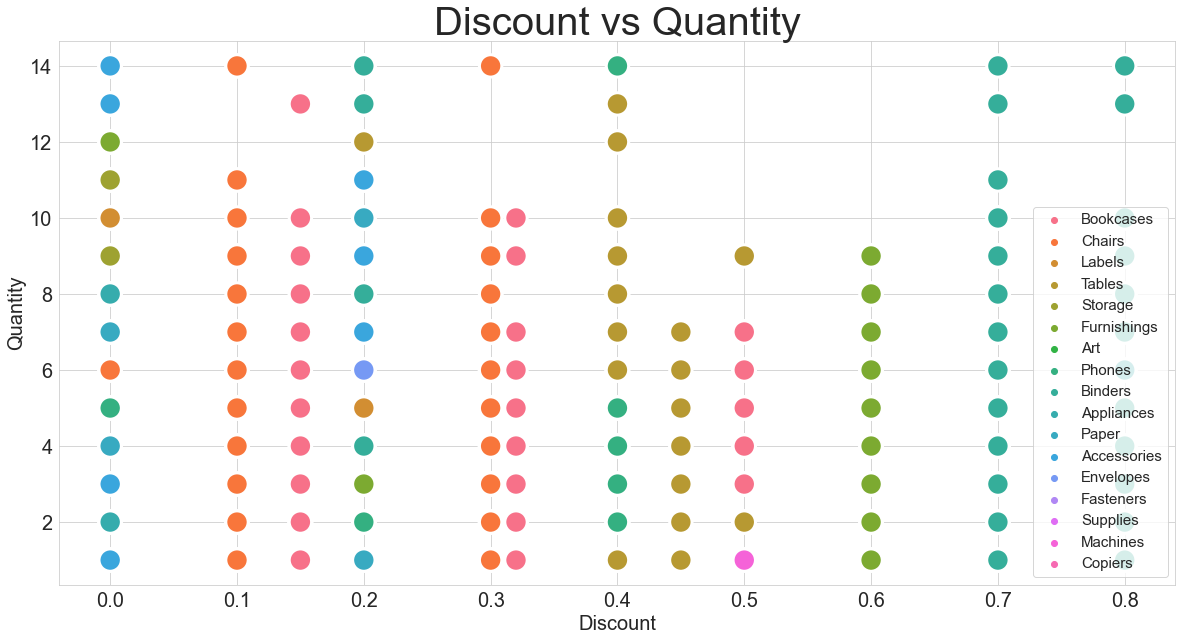

In [39]:
# Profit Vs Discount
plt.figure(figsize=(20,10))
sns.scatterplot(data=retail1,x='Discount',y='Quantity',hue='Sub-Category',color='darkred',linewidth=3,s=500)
plt.title('Discount vs Quantity',fontsize=40,y=1)
plt.ylabel(ylabel = 'Quantity',fontsize=20)
plt.xlabel(xlabel = 'Discount',fontsize=20)
# plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=15,loc='lower right')
plt.yticks(fontsize=20)
plt.show()

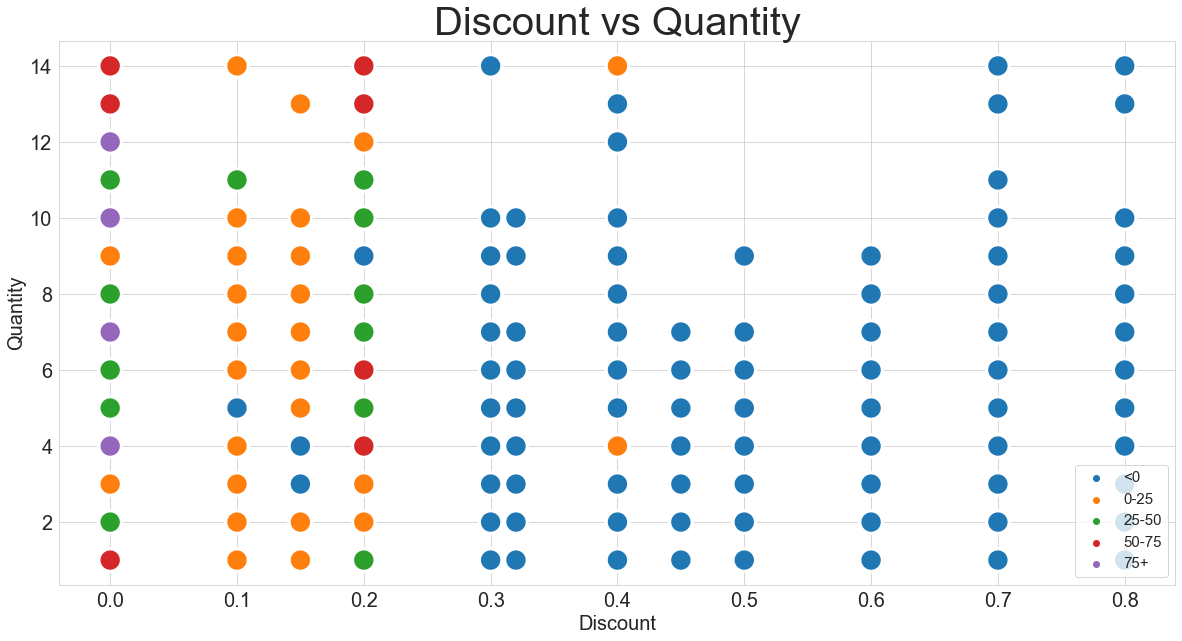

In [40]:
# Profit Vs Discount
plt.figure(figsize=(20,10))
sns.scatterplot(data=retail1,x='Discount',y='Quantity',hue='Profit%_c',color='darkred',linewidth=3,s=500)
plt.title('Discount vs Quantity',fontsize=40,y=1)
plt.ylabel(ylabel = 'Quantity',fontsize=20)
plt.xlabel(xlabel = 'Discount',fontsize=20)
# plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=15,loc='lower right')
plt.yticks(fontsize=20)
plt.show()

### <font color='purple'>Comment :</font>
- We can clearly see from the graph that where the dicounts are low the store is earning more profits as compared to higher discounts as mostly are making negative profits and the store is facing a loss. So it is recommended to lower the discount rates or store can sell the two products together with better discount rates.

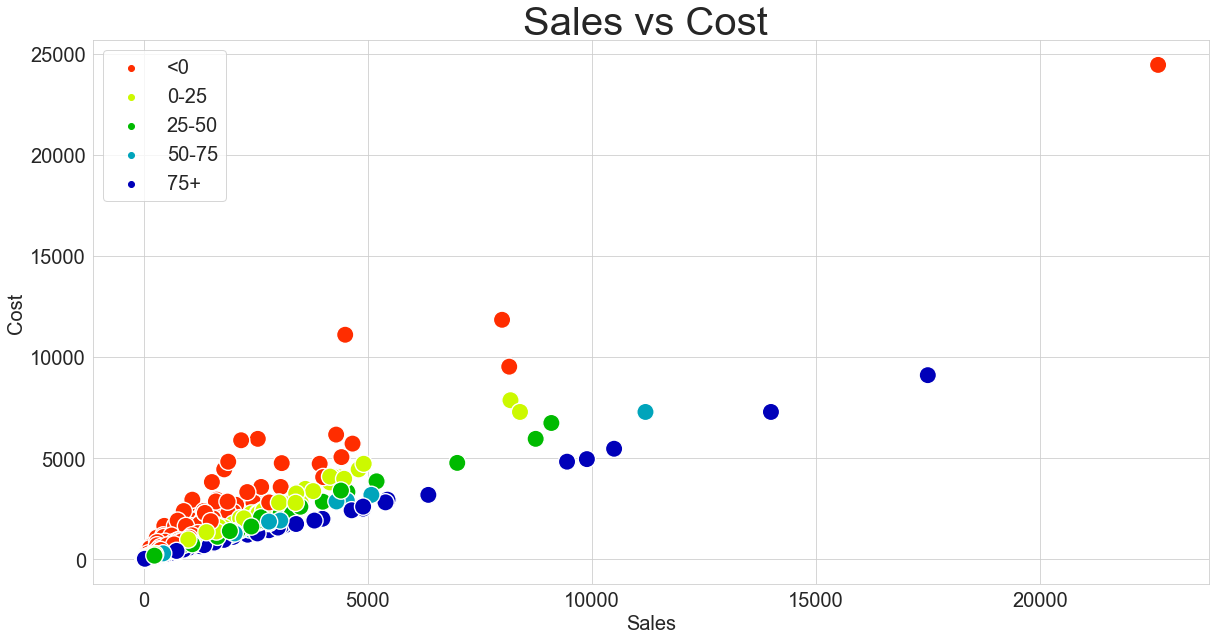

In [41]:
# Scatterplot for Sales vs Cost
plt.figure(figsize=(20,10))
sns.scatterplot(data=retail1,y='Cost',x='Sales',hue='Profit%_c',s=300,palette='nipy_spectral_r')
plt.title('Sales vs Cost ',fontsize=40,y=1)
plt.ylabel(ylabel = 'Cost',fontsize=20)
plt.xlabel(xlabel = 'Sales',fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### <font color='purple'>Comment :</font>

- When the profits are in positive we can see there is a uniformity between sales and cost.
- The plot also depicts that the products in red color are sold at price less than the cost price. Therefore having negative profits.

# Correlations

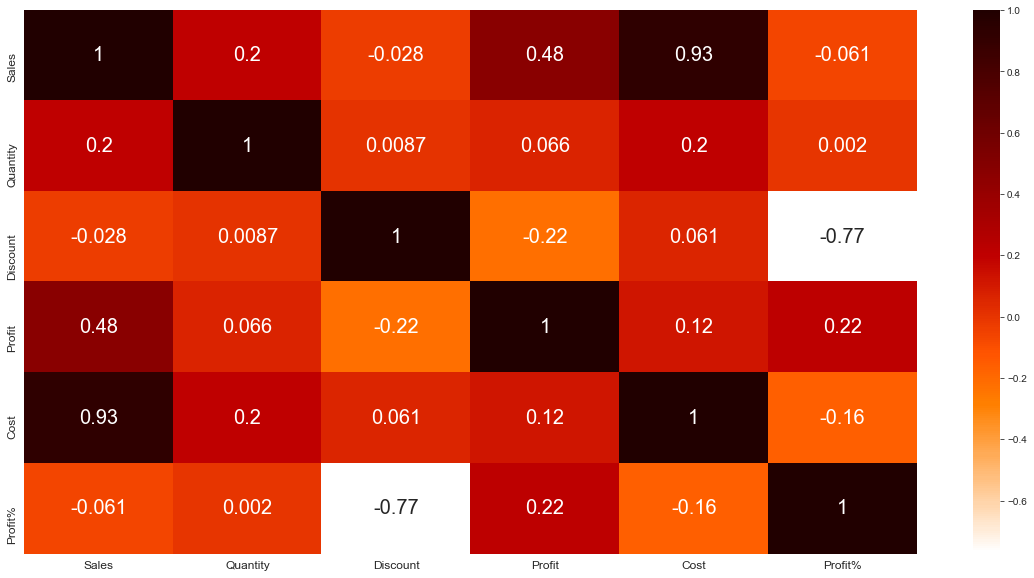

Heatmap Plotted


In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(retail1.corr(),cmap='gist_heat_r',center=0.2,annot=True,annot_kws={'fontsize':20})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('Heatmap Plotted')

# Thanks!